# Y.Afisha

# Descripción del Proyecto

Este estudio tiene como objetivo analizar tres conjuntos de datos del departamento de análisis de Y.Afisha para optimizar los gastos de marketing. Se examinarán los registros del servidor con información desde enero de 2017 hasta diciembre de 2018, con el fin de comprender el comportamiento del usuario, los patrones de compra, los pagos realizados y los ingresos generados por cada usuario.

# Metodología:

-Exploración de datos: Se abrirá y analizará la información general de los conjuntos de datos para familiarizarse con las variables y su distribución.

-Preprocesamiento de datos: Se limpiarán y prepararán los datos para el análisis, lo que puede incluir la eliminación de valores perdidos, la codificación de variables categóricas y la transformación de variables según sea necesario.

-Análisis de datos: Se aplicarán técnicas de análisis de datos exploratorio y estadístico para identificar patrones, tendencias y relaciones significativas en los datos. Esto puede incluir análisis de frecuencia, medidas de tendencia central y dispersión, pruebas de hipótesis y modelos de regresión.

-Elaboración de informes y métricas: Se crearán informes completos que resuman los hallazgos clave del análisis, incluyendo visualizaciones de datos, métricas relevantes y conclusiones derivadas.

-Conclusiones generales: Se sintetizarán los resultados del análisis y se proporcionarán recomendaciones para optimizar los gastos de marketing en Y.Afisha, basándose en los insights obtenidos de los datos.

## Preparación y exploración de datos 

In [1]:
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
visits.info()

print('---------------------------------------------------')

orders.info()

print('---------------------------------------------------')

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data colu

Escaneando de forma general la estructura de los datos con el método ´info()´ en los 3 df (`visits`, `orders`, `costs`) , se aprecia que no hay datos 'nulos' a simple vista. En 2 de los df (`visits`, `orders`) hay una grand cantidad de datos, en donde `visits` tiene **359400** filas y  `orders` tiene **50415** filas. Antes de profundizar en la verficación de calidad de los datos, veamos que columnas se pueden optimizar para un uso menor en la memoria en el cual sea más fluído el procesamoiento de trabajo y evitar errores cuando se estén realizando los análisis.

**Optimización de DF**

# Visits

In [4]:
display(visits.sample(10))

,Device,End Ts,Source Id,Start Ts,Uid
201326,touch,2017-10-24 13:07:00,4,2017-10-24 12:42:00,5846015422166883420
282786,desktop,2017-12-13 12:48:00,4,2017-12-13 12:45:00,7779425495362137255
210986,desktop,2018-02-19 08:26:00,5,2018-02-19 08:22:00,11986713696697624789
299016,desktop,2018-02-18 23:09:00,4,2018-02-18 21:45:00,12303090406571518943
124996,desktop,2018-03-16 16:48:00,1,2018-03-16 16:48:00,7440107703988948500
68458,desktop,2018-01-05 18:54:00,1,2018-01-05 18:47:00,5536269404416553060
109530,desktop,2018-02-07 15:15:00,3,2018-02-07 15:12:00,7683232512483805503
279931,touch,2018-01-28 22:13:00,4,2018-01-28 22:11:00,13711687818592088882
281033,touch,2018-03-23 17:52:00,5,2018-03-23 17:50:00,322171719251589066
316404,desktop,2017-07-13 16:32:00,4,2017-07-13 16:28:00,6004691632216261481


Observaciones:


* Tenemos que la columna `Device` es categorica, pero su tipo de dato es `object`.

* Las columnas `End Ts` y `Start Ts` indican la fecha y hora del inicio y finalización de una acción, pero su tipo de dato es `object`.

* La columna `Source Id` indica de forma resumida del tipo de fuente de donde proviene el usuario, su tipo de dato es `int`. 

* Columna `Uid` nos indica el número único de cada usuario.

Tomando en cuenta esto, se procederá a cambiar el tipo de dato de la columnas `End Ts` y `Start Ts` a tipo de dato fecha `pd.to_datetime` 

Verificamos cuantos datos únicos están regitrados en la columna `Device`

In [5]:
print(visits['Device'].value_counts())

desktop    262567
touch       96833
Name: Device, dtype: int64


Tenemos solo dos, por lo tanto podemos cambiar el tipo de dato a uno categórico! 

**Transformamos tipos de datos de las columnas** `Device`, `End Ts`, `Start Ts`**:**

In [6]:
#Columnas End Ts y Start Ts

visits['End Ts'] = pd.to_datetime(visits['End Ts'], format = "%Y-%m-%d %H:%M:%S" )
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format = "%Y-%m-%d %H:%M:%S")

#Columna Device 

visits['Device'] = visits['Device'].astype('category')

visits['Source Id'] = visits['Source Id'].astype('category')

In [7]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  category      
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(2), datetime64[ns](2), uint64(1)
memory usage: 8.9 MB


# Orders 

In [8]:
display(orders.sample(10))

,Buy Ts,Revenue,Uid
30247,2018-01-20 19:34:00,2.14,1117862782417082466
28283,2018-01-06 00:18:00,2.93,7003033646698303754
12519,2017-10-13 11:56:00,2.44,3512817093443500739
24469,2017-12-16 18:42:00,1.47,13670920671396412172
42934,2018-04-03 15:38:00,1.22,6557252401435337211
46015,2018-04-30 09:40:00,2.69,13820632672891336151
22859,2017-12-08 17:39:00,3.67,3501596628378158474
19428,2017-11-24 17:23:00,0.37,11833428737835958317
31269,2018-01-27 00:01:00,0.61,16957373250633165777
17095,2017-11-11 21:44:00,1.47,4573634315966955657


Observaciones:

* Las columnas `Buy Ts` indican la fecha y hora de la compra, pero su tipo de dato es `object`.

**Tranformaremos el tipo de dato de la columns** `Buy Ts` **a tipo de dato de fecha** `pd.to_datetime`

In [9]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format = "%Y-%m-%d %H:%M:%S" )

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


# Costs

In [11]:
display(costs.sample(10))

,source_id,dt,costs
2012,9,2017-12-14,17.03
2258,10,2017-08-19,4.07
346,1,2018-05-15,47.00
2105,9,2018-03-17,10.86
1435,4,2018-05-15,48.68
577,2,2018-01-01,113.13
95,1,2017-09-04,36.48
1055,3,2018-04-28,316.81
660,2,2018-03-25,125.00
1806,5,2018-05-22,126.79


* Las columna `dt` indica la fecha en el cual se registró el monto invertido en publicidad según el tipo de 'campaña publicitaria', pero su tipo de dato es `object`.

**Tranformaremos el tipo de dato de la columna** `dt` **a tipo de dato de fecha** `pd.to_datetime`

In [12]:
costs['dt'] = pd.to_datetime(costs['dt'], format = "%Y-%m-%d %H:%M:%S" )

In [13]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


# Columnas de Dataframes

Los encabezados de las columnas `visits` y `orders` no son lo mas comodas para trabajar cuando se requieran escribir en código. A continuación, la modificación: 

# visits

In [14]:
# Se cambia el orden de las columnas 

new_order = ['Uid' , 'Start Ts' , 'End Ts', 'Source Id', 'Device']

visits = visits[new_order] 

display(visits.head())

,Uid,Start Ts,End Ts,Source Id,Device
0,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,4,touch
1,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2,desktop
2,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,5,touch
3,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,9,desktop
4,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,3,desktop


In [15]:
new_col = ['uid', 'start_ts', 'end_ts', 'source_id', 'device']

visits.columns = new_col

display(visits.head())

,uid,start_ts,end_ts,source_id,device
0,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,4,touch
1,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2,desktop
2,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,5,touch
3,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,9,desktop
4,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,3,desktop


# orders

In [16]:
# Se cambia el orden de las columnas

new_order_ = ['Uid' , 'Buy Ts' , 'Revenue']

orders = orders[new_order_] 

display(orders.head())

,Uid,Buy Ts,Revenue
0,10329302124590727494,2017-06-01 00:10:00,17.00
1,11627257723692907447,2017-06-01 00:25:00,0.55
2,17903680561304213844,2017-06-01 00:27:00,0.37
3,16109239769442553005,2017-06-01 00:29:00,0.55
4,14200605875248379450,2017-06-01 07:58:00,0.37


In [17]:
new_col = ['uid', 'buy_ts', 'revenue']

orders.columns = new_col

display(orders.head())

,uid,buy_ts,revenue
0,10329302124590727494,2017-06-01 00:10:00,17.00
1,11627257723692907447,2017-06-01 00:25:00,0.55
2,17903680561304213844,2017-06-01 00:27:00,0.37
3,16109239769442553005,2017-06-01 00:29:00,0.55
4,14200605875248379450,2017-06-01 07:58:00,0.37


# Valores Ausentes 

In [18]:
# Verificamos valores de las columnas categoricas de el df 'visits'

print("valores categoricos en la columna 'source_id': ")

print(visits['source_id'].value_counts().sort_index())

print('---------------------------------------------------------------------------------------------------------')

print("valores categoricos en la columna 'device': ")

print(visits['device'].value_counts())

valores categoricos en la columna 'source_id': 
1      34121
2      47626
3      85610
4     101794
5      66905
6          6
7         36
9      13277
10     10025
Name: source_id, dtype: int64
---------------------------------------------------------------------------------------------------------
valores categoricos en la columna 'device': 
desktop    262567
touch       96833
Name: device, dtype: int64


In [19]:
# Verificamos valores de las columna de el df 'costs'

print("valores categoricos en la columna 'source_id': ")

print(costs['source_id'].value_counts().sort_index())


valores categoricos en la columna 'source_id': 
1     363
2     363
3     363
4     363
5     364
9     363
10    363
Name: source_id, dtype: int64


Fue interesante realizar esta exploración en los datos, podemos ver que las fuentes de anuncio se categorizan por números, y van del *1 al 10*, exceptuando número *8*

**Conclusiones**

Indiferentemente que no se detectaron valores asuentes en los **df** con el método `info.()`, estamos seguros de que no hay 'valores nulos' por mal ingreso de datos. Razones:

* La columna uid es de tipo 'unit64' representa valores de números enteros sin signo.

* Al cambiar los tipos de valor de las columnas `end_ts` , `start_ts`, `buy_ts` y `dt` a tipo fecha, no presentó error en la transformación, ya que no llevaba valores ausentes o con estrucctura que no fuera compatible con la transformación de tipo del dato.

* Las columnas que representan valores categoricos, al emplear el método `value_counts`, se puede apreciar de que no contiene valores que no concuerden con el patron de los datos. ej: 'rojo, verde, amarillo, *nocolor*, negro'



# Valores atípicos 


Verifiquemos la cálidad de los valores 'medibles' en cada uno de los datasets. 

* Verificar que los valores de la columna `revenue` en el **df** `orders` no incluyan valores que afecten el análisis  
* Verificar que el tiempo de visita de los usuarios sea acorde, y que no afecte nuestro análisis. 

**Orders**

In [20]:
# Se aplica el método 'describe' para ver mínimos, máximos y promedios 
display(orders['revenue'].describe())

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

El mínimo de ingresos es '0.00', veamos por qué se debe o qué tienen en común.

In [21]:
orders_no_rev = orders[orders['revenue'] == 0 ]

display('ordenes sin ingreso:', orders_no_rev['uid'].count())


print('--------------------------------------------------------------------------------------')

orders_no_rev_gp = orders_no_rev.groupby('uid')['buy_ts'].count().reset_index()

orders_no_rev_gp.columns = ['uid' , 'counts']

display(orders_no_rev_gp.sort_values(by='counts', ascending=False).head(5))

print('--------------------------------------------------------------------------------------')

orders_no_rev_ = orders_no_rev.copy()

orders_no_rev_['buy_date'] = orders_no_rev['buy_ts'].dt.date

orders_no_rev_dt = orders_no_rev_.groupby(['buy_date', 'uid'])['revenue'].count().reset_index()

orders_no_rev_dt.columns = ['buy_date' ,'uid', 'revenue']

display(orders_no_rev_dt.sort_values(by='buy_date' , ascending = True).head(30))


'ordenes sin ingreso:'

51

--------------------------------------------------------------------------------------


,uid,counts
3,2037345392173160982,12
10,5603453646174104178,6
12,8277558335454815700,6
7,4927261749585088199,4
9,5570343171257035973,4


--------------------------------------------------------------------------------------


,buy_date,uid,revenue
0,2017-06-22,17030528792926543083,1
1,2017-07-07,10281425020415612933,1
2,2017-08-02,184148767273119549,1
3,2017-08-09,5603453646174104178,1
4,2017-08-23,5603453646174104178,1
5,2017-08-30,5603453646174104178,1
6,2017-09-06,5603453646174104178,1
7,2017-09-07,5603453646174104178,1
8,2017-09-11,10169885790465067808,1
9,2017-09-18,2883839899480223178,1


Hay 51 filas que registran **0.00 ingresos** , el cual se ve representado en 22 usuarios. En ello, también se ve la peculiaridad de que un usuario realizó 'ordenes' **12 veces**, entre ellas el mismo día. Detallando esta característica por fecha y sobre cuantas veces ocurrió a cada usuario, se nota que esto paso entre distintos usuarios en fechas consecutivas que van del *26-11-2017 al 04-12-2017*. Esto puede deberse a un error que tuvo la página en el *check out* cuando el usuario intentaba comprar. Teniendo esto en cuenta que es un error, **descartaremos** estos registros de el *df* **orders**, ya que significan compras no efectuadas. 

**Visits**

In [22]:
visits['session_time_seconds'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [23]:
visits['session_time_seconds'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_time_seconds, dtype: float64

Llama mucho la atención el rango tan amplio de tiempo, hay sesiones con una duración de hasta casi 24 hrs. Veamos las 5 sesiones con más tiempo

In [24]:
display(visits.sort_values(by='session_time_seconds', ascending =False).head(5))

,uid,start_ts,end_ts,source_id,device,session_time_seconds
4181,13092152539246794986,2018-03-25 03:50:00,2018-03-25 03:18:00,3,desktop,84480
177972,4621202742905035453,2018-03-25 03:55:00,2018-03-25 03:09:00,9,desktop,83640
229891,15566184277200431914,2017-12-18 10:52:00,2017-12-18 22:43:00,3,desktop,42660
177381,2909927403543287328,2017-08-01 11:02:00,2017-08-01 20:58:00,1,desktop,35760
248062,2909927403543287328,2017-07-27 11:13:00,2017-07-27 20:21:00,1,desktop,32880


Las primeras 2 filas de esta extracción tienen datos de inicio y fin de timepo erroneos. Al parecer, el inicio y finalización de sesión está invertida

In [25]:
# Se invierten valores

visits.loc[4181, ['start_ts', 'end_ts']] = visits.loc[4181, ['end_ts', 'start_ts']].values
visits.loc[177972, ['start_ts', 'end_ts']] = visits.loc[177972, ['end_ts', 'start_ts']].values

# Se llama nuevamente el código para crear la columna del tiempo de sesion en segundos, para que se efectúe el cambio

visits['session_time_seconds'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

display(visits.sort_values(by='session_time_seconds', ascending =False).head(5))

,uid,start_ts,end_ts,source_id,device,session_time_seconds
229891,15566184277200431914,2017-12-18 10:52:00,2017-12-18 22:43:00,3,desktop,42660
177381,2909927403543287328,2017-08-01 11:02:00,2017-08-01 20:58:00,1,desktop,35760
248062,2909927403543287328,2017-07-27 11:13:00,2017-07-27 20:21:00,1,desktop,32880
1197,2909927403543287328,2017-07-21 11:04:00,2017-07-21 20:06:00,1,desktop,32520
221945,2909927403543287328,2017-07-29 11:02:00,2017-07-29 19:46:00,2,desktop,31440


El rango de tiempo de sesión de los usuarios es amplia, parten desde los *0 seg.* a casi *12hrs.* 

In [26]:
# Cuántos registros tienen sesion de 0 seg.

print(visits[visits['session_time_seconds'] == 0].count())

uid                     35794
start_ts                35794
end_ts                  35794
source_id               35794
device                  35794
session_time_seconds    35794
dtype: int64


De *359400* registros, *35794* son los que hicieron una permanencia de 0 seg. Representando **casi el 10%** de los datos. Indirentemente de ello, se mantendran estos datos ya que este comportamiento de los usuarios puede ser útil para responder algunas preguntas mas adelante. Ej: Más rechazo a una fuente de publicidad que a otra

# Duplicados

In [27]:
duplicated_rows_v = visits[visits.duplicated(keep=False)]
duplicated_rows_o = orders[orders.duplicated(keep=False)]

display(duplicated_rows_v)
display(duplicated_rows_o)

,uid,start_ts,end_ts,source_id,device,session_time_seconds


,uid,buy_ts,revenue


## Análisis de Datos

### **Analicemos cuántas personas lo usan por día, semana y mes**

In [28]:
visits['day'] = visits['start_ts'].dt.day
visits['year'] = visits['start_ts'].dt.year
visits['week'] = visits['start_ts'].dt.week
visits['month'] = visits['start_ts'].dt.month
visits.head()

,uid,start_ts,end_ts,source_id,device,session_time_seconds,day,year,week,month
0,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,4,touch,1080,20,2017,51,12
1,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2,desktop,1680,19,2018,8,2
2,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,5,touch,0,1,2017,26,7
3,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,9,desktop,1440,20,2018,20,5
4,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,3,desktop,0,27,2017,52,12


#### Uso por día

In [29]:
daily_users = visits.groupby(['year', 'month', 'day']).agg({'uid' : 'nunique'}).reset_index()

daily_users.columns = [['year', 'month', 'day', 'users_per_day']]

mean_day = visits.groupby(['year' , 'month', 'day']).agg({'uid' : 'nunique'}).mean()

print('promedio de usuarios por día:', int(mean_day))

display(daily_users)

promedio de usuarios por día: 907


,year,month,day,users_per_day
0,2017,6,1,605
1,2017,6,2,608
2,2017,6,3,445
3,2017,6,4,476
4,2017,6,5,820
...,...,...,...,...
359,2018,5,27,620
360,2018,5,28,1039
361,2018,5,29,948
362,2018,5,30,1289


#### Uso por semana 

In [30]:
week_user = visits.groupby(['year' , 'month', 'week']).agg({'uid' : 'nunique'}). reset_index()

week_user.columns = [['year','month', 'week', 'users_per_week']]

mean_week = visits.groupby(['year' , 'month', 'week']).agg({'uid' : 'nunique'}).mean()                     

print('promedio de usuarios por semana:', int(mean_week) )
print('')

display(week_user)

promedio de usuarios por semana: 4911



,year,month,week,users_per_week
0,2017,6,22,2021
1,2017,6,23,4129
2,2017,6,24,2812
3,2017,6,25,2878
4,2017,6,26,2435
...,...,...,...,...
57,2018,5,18,3462
58,2018,5,19,4128
59,2018,5,20,5070
60,2018,5,21,4995


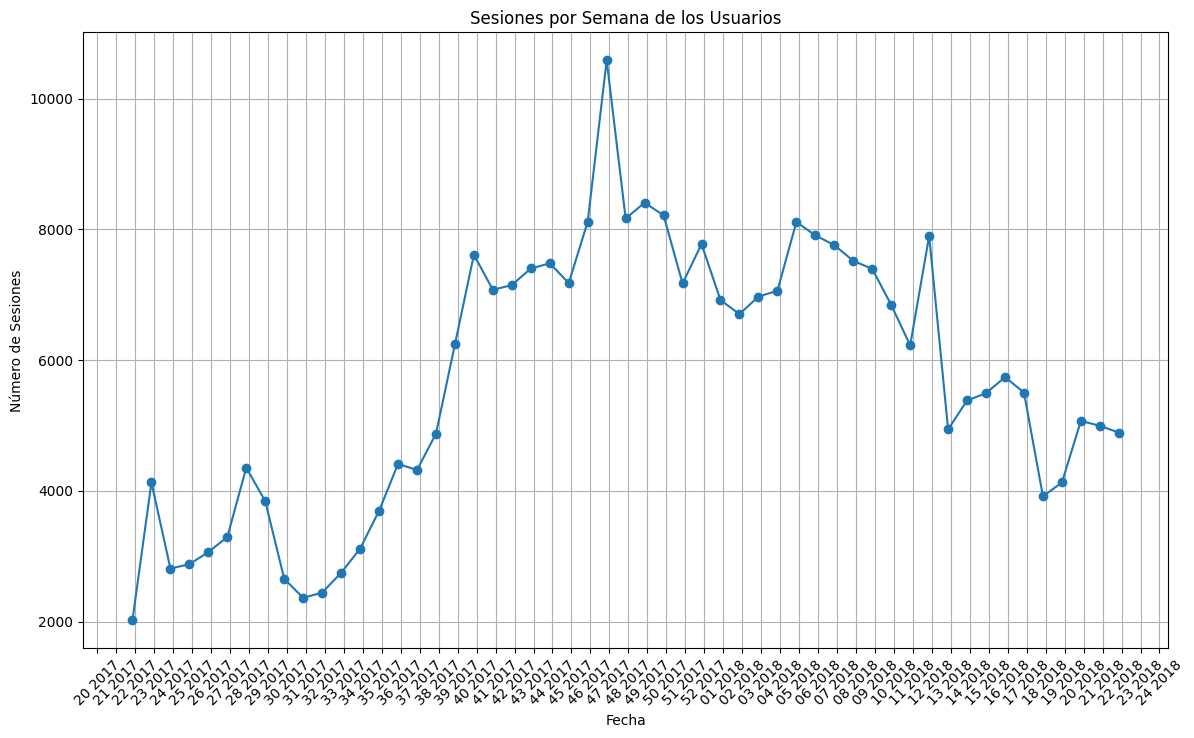

In [31]:
week_user = visits.groupby(['year', 'week']).agg({'uid': 'nunique'}).reset_index()
week_user.columns = ['year', 'week', 'users_per_week']

# Crear la columna de fecha
week_user['date'] = pd.to_datetime(week_user['year'].astype(str) + '-' + week_user['week'].astype(str) + '-1', format='%G-%V-%u')


plt.figure(figsize=(14, 8))
plt.plot(week_user['date'], week_user['users_per_week'], marker='o', linestyle='-')
plt.title('Sesiones por Semana de los Usuarios')
plt.xlabel('Fecha')
plt.ylabel('Número de Sesiones')
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%W %Y'))
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

#### Uso por mes 

In [32]:
month_user = visits.groupby(['year', 'month']).agg({'uid' : 'nunique'}).reset_index()

month_user.columns= [['year', 'month', 'users_per_month']]

mean_month = visits.groupby(['year', 'month']).agg({'uid' : 'nunique'}).mean()                     

print('promedio de usuarios por mes:', int(mean_month) )
print('')
display(month_user)

promedio de usuarios por mes: 23228



,year,month,users_per_month
0,2017,6,13259
1,2017,7,14183
2,2017,8,11631
3,2017,9,18975
4,2017,10,29692
5,2017,11,32797
6,2017,12,31557
7,2018,1,28716
8,2018,2,28749
9,2018,3,27473


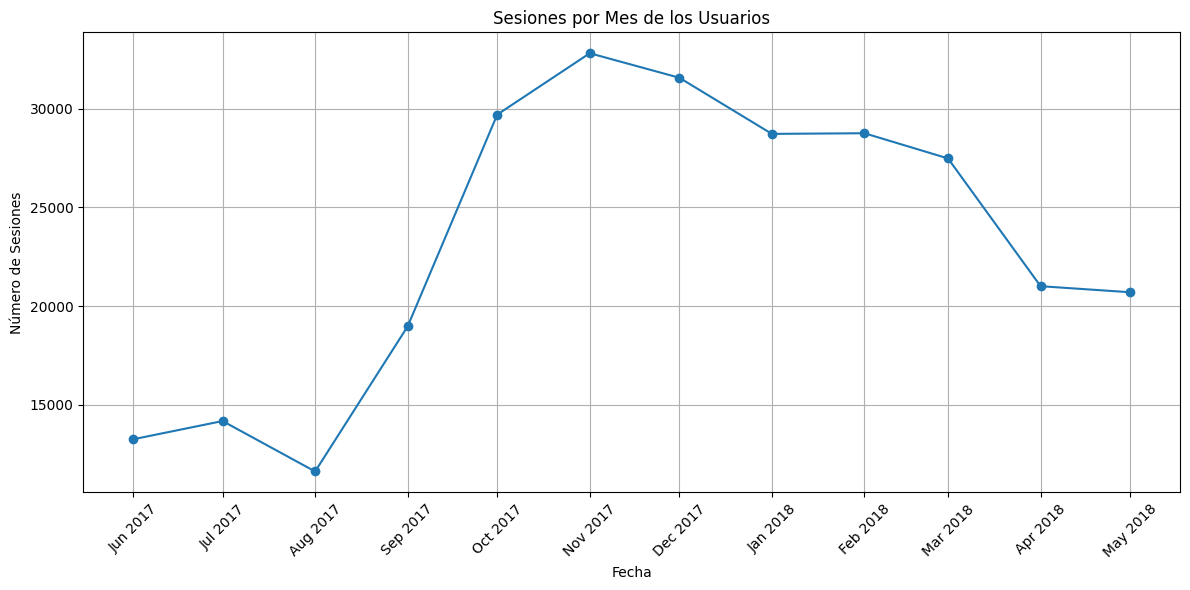

In [33]:
month_user = visits.groupby(['year', 'month']).agg({'uid': 'nunique'}).reset_index()
month_user.columns = ['year', 'month', 'users_per_month']

# Crear la columna de fecha
month_user['date'] = pd.to_datetime(month_user[['year', 'month']].assign(day=1))


plt.figure(figsize=(12, 6))
plt.plot(month_user['date'], month_user['users_per_month'], marker='o', linestyle='-')
plt.title('Sesiones por Mes de los Usuarios')
plt.xlabel('Fecha')
plt.ylabel('Número de Sesiones')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Sesiones por Día 

**Veamos cuál es la frecuencia de regreso en los usuarios**

In [34]:
visits['date'] = visits['start_ts'].dt.date 
sessions_per_user = visits.groupby(['date']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['session_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])

print('promedio de sesiones por usuario:', sessions_per_user['session_per_user'].mean().round(2))
display(sessions_per_user.head(5))

promedio de sesiones por usuario: 1.08


,n_sessions,n_users,session_per_user
date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


**Demos una vista mas de cerca a las sesiones graficando los datos que tenemos**

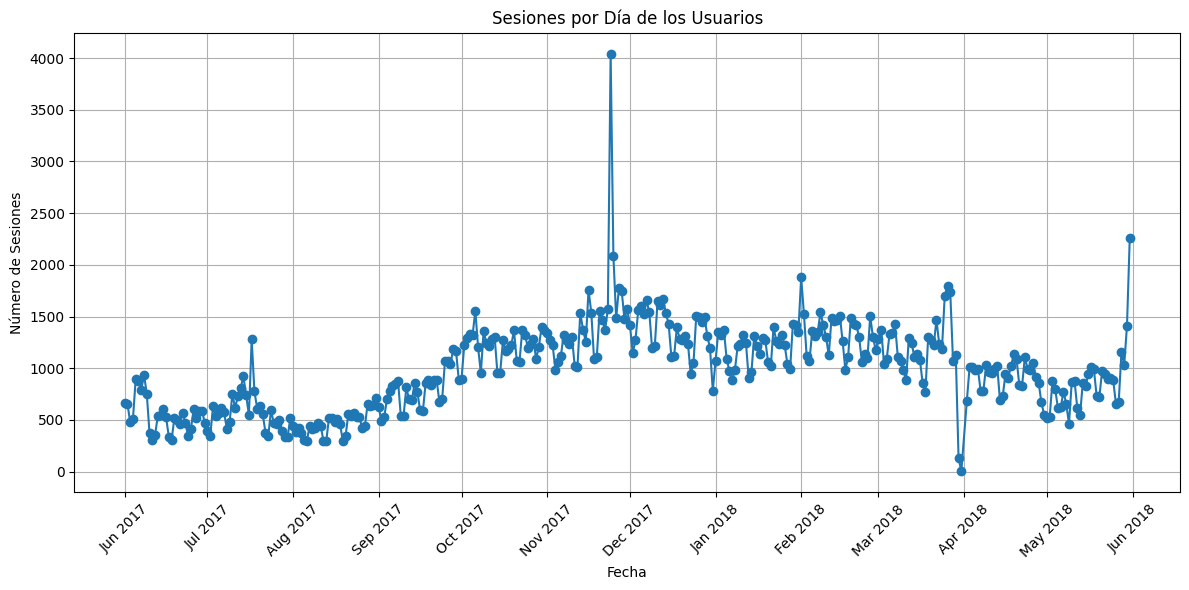

In [35]:
import matplotlib.dates as mdates

sessions_per_day = visits.groupby(['year', 'month', 'day'])['uid'].count().reset_index(name='sessions_per_day')

sessions_per_day['date'] = pd.to_datetime(sessions_per_day[['year', 'month', 'day']])

plt.figure(figsize=(12, 6))
plt.plot(sessions_per_day['date'], sessions_per_day['sessions_per_day'], marker='o', linestyle='-')
plt.title('Sesiones por Día de los Usuarios')
plt.xlabel('Fecha')
plt.ylabel('Número de Sesiones')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Con el gráfico podemos apreciar cómo creció frecuencia de la visita de la página durante *agosto* del *2017*, siendo su nivelación promedio durante el mes de *octubre* del *2017*. *Desde octubre del 2017 a marzo del 2018*, se ha mantenido una media constante de visitas a la página sobre las **1000 visitas**. Siendo las fechas más importantes en diciembre, con un peak máximo de 4000 visitas a finales de *diciembre del 2017*.

#### **Veamos la frecuencia de conexiones por día se semana y horarios en el que los usuarios ingresan más a la tienda**

Para ello usaremos el df de `visits`, en donde agregaremos las columnas que reflejen la hora y dia de la semana. Con esto, después podemos hacer una tabla dinámica que represente la frecuencia de conexiones según el día de la semana y hora. 

In [36]:
visits['hour'] = visits['start_ts'].dt.hour
visits['day_of_week'] = visits['start_ts'].dt.dayofweek

# Agrupación de conexiones según el día de semana y hora 
hourly_connections = visits.groupby(['day_of_week', 'hour']).size().reset_index(name='connections')

# Tabla dinámica para mostrar las coneximones por día 
heatmap_data = hourly_connections.pivot('day_of_week', 'hour', 'connections')

display (heatmap_data)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
0,1571,801,428,213,127,133,291,484,1210,2296,...,3904,3850,3927,3705,3134,2946,3240,3457,3413,2578
1,1570,834,402,230,136,147,300,637,1438,2580,...,3747,3673,3516,3312,2759,2687,3001,3124,3160,2447
2,1514,729,383,216,148,157,311,657,1371,2424,...,3726,3541,3351,3151,2779,2597,2939,3105,3228,2470
3,1631,762,376,181,155,158,275,693,1586,2725,...,4067,4114,3944,3477,2965,2872,3043,3337,3350,2618
4,1701,819,418,216,141,155,277,656,1549,2613,...,3664,3657,3559,3118,2852,2768,2842,3117,3120,2621
5,1923,1005,485,252,156,139,220,452,900,1449,...,2574,2557,2447,2257,2354,2377,2582,2670,2734,2337
6,1791,1084,518,286,166,148,173,354,673,1164,...,2457,2331,2378,2375,2425,2558,2693,2843,2838,2304


**Para representarlo de manera gráfica, creemos un mapa de calor y ver la distribución de los datos de una forma clara**

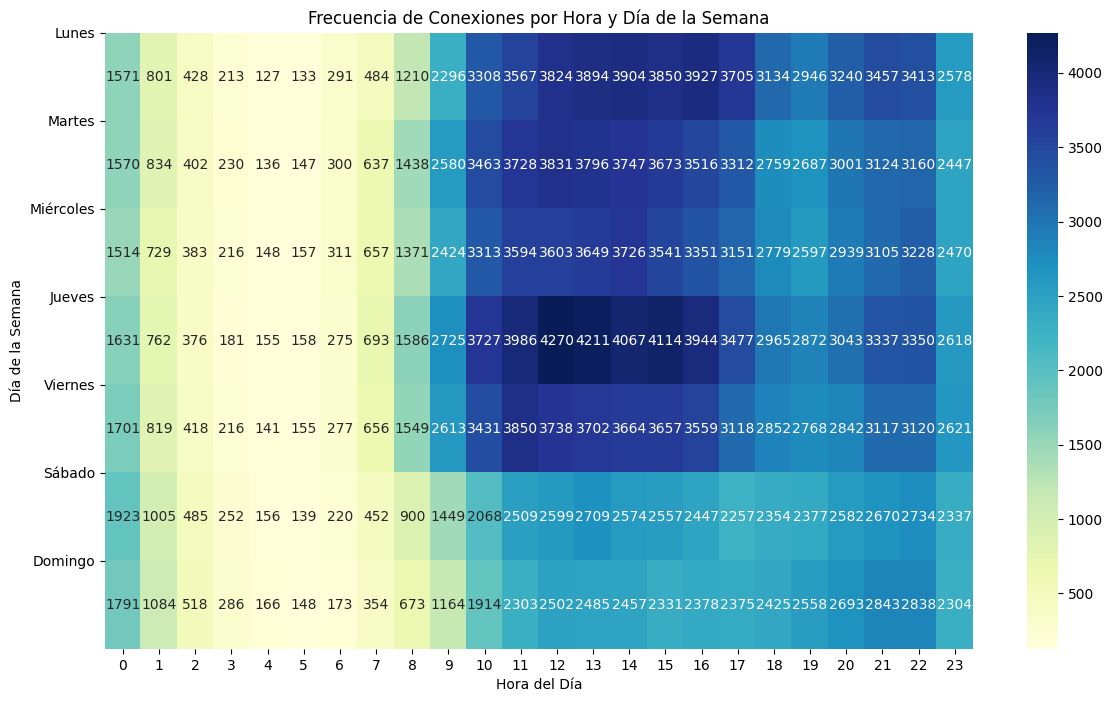

In [37]:
# Mapa de calor
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Frecuencia de Conexiones por Hora y Día de la Semana')
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.yticks([0, 1, 2, 3, 4, 5, 6], ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], rotation=0)
plt.show()

Podemos destacar que los usuarios en general prefieren usar más la página durante los días hábiles de la semana, y en horarios 'comúnes' de actividad o atención en comercios, entiendase desde las *10:00hrs a las 17:00hrs*. y en horarios nocturnos desde las *21:00hrs a las 22:00hrs*. Se puede destacar los días jueves tiene la mayor frecuencia dentro del día.

### Duración de Sesiones

In [38]:
session_durations = visits[['uid', 'session_time_seconds']]
print('promedio de duración de sesión por usuario:', int(session_durations['session_time_seconds'].mean()),'seg')
#display(session_durations)

promedio de duración de sesión por usuario: 643 seg


**Representemos en una greáfica la distribución de visitas en la página por usuario**

<AxesSubplot:>

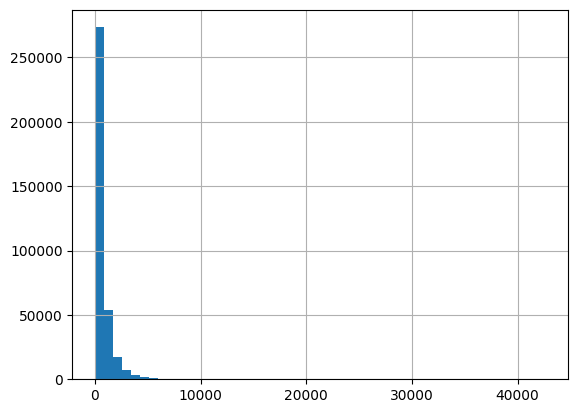

In [39]:
session_durations['session_time_seconds'].hist(bins=50)

El rango de tiempo es inmenso, vemos desde más cerca

<AxesSubplot:>

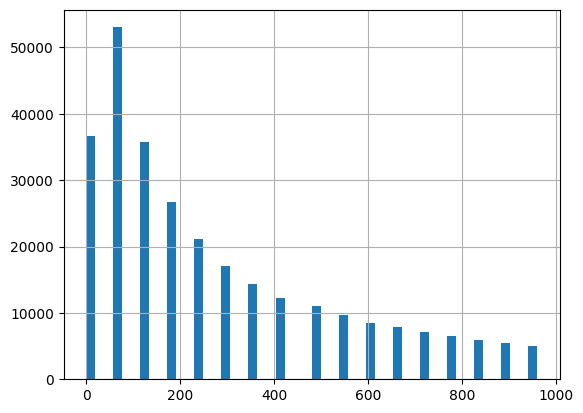

In [40]:
short = session_durations[session_durations['session_time_seconds'] <= 1000]
short['session_time_seconds'].hist(bins=50)

**La mayor concentración esta dentro de los 200 seg. Para tener una respuesta más acerdata, se va a emplear el método `mode`  para ver el valor más común**

In [41]:
print(session_durations['session_time_seconds'].mode())

0    60
dtype: int64


**60 segundos!** 

duración promedio de usuarios que compran

### Retención de usuarios 

Evaluaremos la frecuencia de los usurios en la página web. Primero se creará un cohorte con el registro de la primera visita en el mes de cada usuario y su cantidad

In [42]:
visits['month_date'] = visits['start_ts'].astype('datetime64[M]')

first_visit = visits.groupby('uid').agg({'month_date' : 'min'}).reset_index()
first_visit.columns = ['uid' , 'first_visit_month']
first_visit.head()

,uid,first_visit_month
0,11863502262781,2018-03-01
1,49537067089222,2018-02-01
2,297729379853735,2017-06-01
3,313578113262317,2017-09-01
4,325320750514679,2017-09-01


In [43]:
cohorts_visits = first_visit.groupby('first_visit_month').agg({'uid': 'nunique'}).reset_index()
cohorts_visits.columns = ['first_visit_month', 'n_visitors']
cohorts_visits.head()

,first_visit_month,n_visitors
0,2017-06-01,13259
1,2017-07-01,13140
2,2017-08-01,10181
3,2017-09-01,16704
4,2017-10-01,25977


**Se añade la información de la primera compra en el mes al df de visits**

In [44]:
visits_ = pd.merge(visits , first_visit, on = 'uid')
display(visits_.head())

,uid,start_ts,end_ts,source_id,device,session_time_seconds,day,year,week,month,date,hour,day_of_week,month_date,first_visit_month
0,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,4,touch,1080,20,2017,51,12,2017-12-20,17,2,2017-12-01,2017-12-01
1,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2,desktop,1680,19,2018,8,2,2018-02-19,16,0,2018-02-01,2018-02-01
2,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,5,touch,0,1,2017,26,7,2017-07-01,1,5,2017-07-01,2017-07-01
3,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,9,desktop,1440,20,2018,20,5,2018-05-20,10,6,2018-05-01,2018-03-01
4,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:33:00,4,desktop,1680,9,2018,10,3,2018-03-09,20,4,2018-03-01,2018-03-01


Para calcular la tasa de rentención se procederá a dividir el número de usuarios únicos `uid` por el número de visitantes `n_visitors`. Después la vida del cohort en meses se calculará restando `first_visit_month` de `month_date` y dividiendo por el número de días en un mes (np.timedelta64(1, 'M')).

In [45]:
#conteo de usuarios unicos agrupados por la primera visita del mes y según el mes
first_visits_count = visits_.groupby(['first_visit_month', 'month_date']).agg({'uid': 'nunique'}).reset_index()

#se agrega la cantidad de usurios visitantes según el mes
freq = pd.merge(cohorts_visits, first_visits_count, on = 'first_visit_month')
freq['retention'] = freq['uid'] / freq['n_visitors']
freq['cohort_lifetime_visits'] = (freq['month_date'] - freq['first_visit_month']) / np.timedelta64(1, 'M')
freq['cohort_lifetime_visits'] = freq['cohort_lifetime_visits'].round().astype('int')
display(freq.head(10)) 

,first_visit_month,n_visitors,month_date,uid,retention,cohort_lifetime_visits
0,2017-06-01,13259,2017-06-01,13259,1.000000,0
1,2017-06-01,13259,2017-07-01,1043,0.078664,1
2,2017-06-01,13259,2017-08-01,713,0.053775,2
3,2017-06-01,13259,2017-09-01,814,0.061392,3
4,2017-06-01,13259,2017-10-01,909,0.068557,4
5,2017-06-01,13259,2017-11-01,947,0.071423,5
6,2017-06-01,13259,2017-12-01,809,0.061015,6
7,2017-06-01,13259,2018-01-01,766,0.057772,7
8,2017-06-01,13259,2018-02-01,694,0.052342,8
9,2017-06-01,13259,2018-03-01,674,0.050833,9


Se crea una tabla pivote que muestra la tasa de retención promedio `retention` para cada combinación de `first_visit_month` y  `cohort_lifetime_visits`.

In [46]:
heat_map = freq.pivot_table(index='first_visit_month', columns='cohort_lifetime_visits', values='retention', aggfunc='mean').round(2)
display(heat_map)

cohort_lifetime_visits,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,1.0,0.08,0.05,0.06,0.07,0.07,0.06,0.06,0.05,0.05,0.04,0.04
2017-07-01,1.0,0.06,0.05,0.06,0.06,0.05,0.05,0.05,0.04,0.03,0.03,NaN
2017-08-01,1.0,0.08,0.06,0.06,0.05,0.04,0.04,0.04,0.03,0.03,NaN,NaN
2017-09-01,1.0,0.09,0.07,0.05,0.04,0.04,0.04,0.02,0.02,NaN,NaN,NaN
2017-10-01,1.0,0.08,0.05,0.04,0.03,0.03,0.02,0.02,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.08,0.04,0.04,0.03,0.02,0.02,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.06,0.04,0.03,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.06,0.04,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.06,0.03,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Existe una tendencia clara de disminución en la retención con el tiempo, con muy pocos usuarios permaneciendo activos después de seis meses. Los datos más recientes muestran una caída aún más rápida, con retención nula o muy baja después del cuarto o quinto mes.

 La retención sigue disminuyendo gradualmente. En promedio, la retención cae a un *2-7%* a partir del tercer mes, y continúa disminuyendo hasta alrededor del *2%* en meses posteriores.

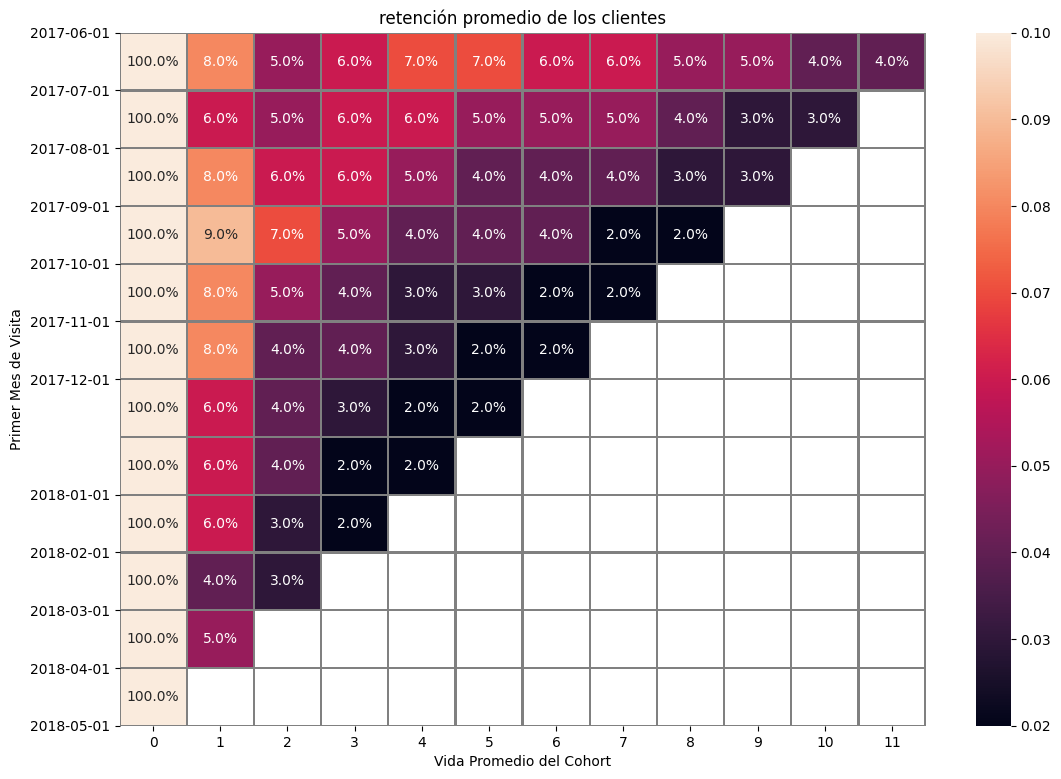

In [47]:
plt.figure(figsize=(13, 9))
plt.title('retención promedio de los clientes')
sns.heatmap(heat_map, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1)
plt.xlabel('Vida Promedio del Cohort')
plt.ylabel('Primer Mes de Visita')
plt.yticks([0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12], ['2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01'], rotation=0)
plt.show()

## Ventas

### ¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).

In [48]:
orders.head(3)

,uid,buy_ts,revenue
0,10329302124590727494,2017-06-01 00:10:00,17.00
1,11627257723692907447,2017-06-01 00:25:00,0.55
2,17903680561304213844,2017-06-01 00:27:00,0.37


Se creará una nueva tabla agrupando los datos de `orders` por `uid`, y se seleccionará la fecha de la primera compra (`buy_ts` más antigua)

In [49]:
first_orders_dates = orders.groupby('uid').agg({'buy_ts' : 'min'}).reset_index()

first_orders_dates.columns = ['uid' , 'first_order_date']

display(first_orders_dates.head())

,uid,first_order_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


Ahora, una nueva tabla agrupando los datos de `visits` por `uid`, y se seleccionará la fecha de la primera sesión (`start_ts` más antigua)

In [50]:
first_session_dates = visits.groupby('uid').agg({'start_ts' : 'min'}).reset_index()

first_session_dates.columns = ['uid' , 'first_session_date']

display(first_session_dates.head())

,uid,first_session_date
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


Se unen las tablas `first_session_dates` y `first_orders_dates` utilizando el método `merge` con `uid` como clave. Además de añadir una columna de tiempo de conversión (`turnover_time`) como la diferencia entre `first_order_date` y `first_session_date`.

In [51]:
turnover = pd.merge(first_session_dates, first_orders_dates, on= 'uid')
turnover['turnover_time'] = turnover['first_order_date'] - turnover['first_session_date']
turnover.head()

,uid,first_session_date,first_order_date,turnover_time
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106 days 23:02:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0 days 01:19:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0 days 19:44:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0 days 00:00:00


**Ahora, creemos una tabla con el tiempo de conversión por usuario**

Tenemos la tabla `users_conversion` con las columnas `uid` y `turnover_time`, eliminando duplicados. Se eliminan los duplicados para asegurar que cada usuario (uid) aparezca una sola vez en la tabla. De esta manera, se obtiene una medida precisa del tiempo de conversión para cada usuario sin que las filas duplicadas distorsionen los cálculos subsiguientes.

In [52]:
users_conversion = turnover[['uid', 'turnover_time']].drop_duplicates(subset = ['uid'])

users_conversion['days_to_conversion'] = users_conversion['turnover_time'] / np.timedelta64(1,'D')
users_conversion['days_to_conversion'] = users_conversion['days_to_conversion'].round().astype('int')
users_conversion['mins_to_conversion'] = users_conversion['turnover_time'] / np.timedelta64(1,'m')
users_conversion['mins_to_conversion'] = users_conversion['mins_to_conversion'].round().astype('int')

users_conversion.head()

,uid,turnover_time,days_to_conversion,mins_to_conversion
0,313578113262317,106 days 23:02:00,107,154022
1,1575281904278712,0 days 00:00:00,0,0
2,2429014661409475,0 days 01:19:00,0,79
3,2464366381792757,0 days 19:44:00,1,1184
4,2551852515556206,0 days 00:00:00,0,0


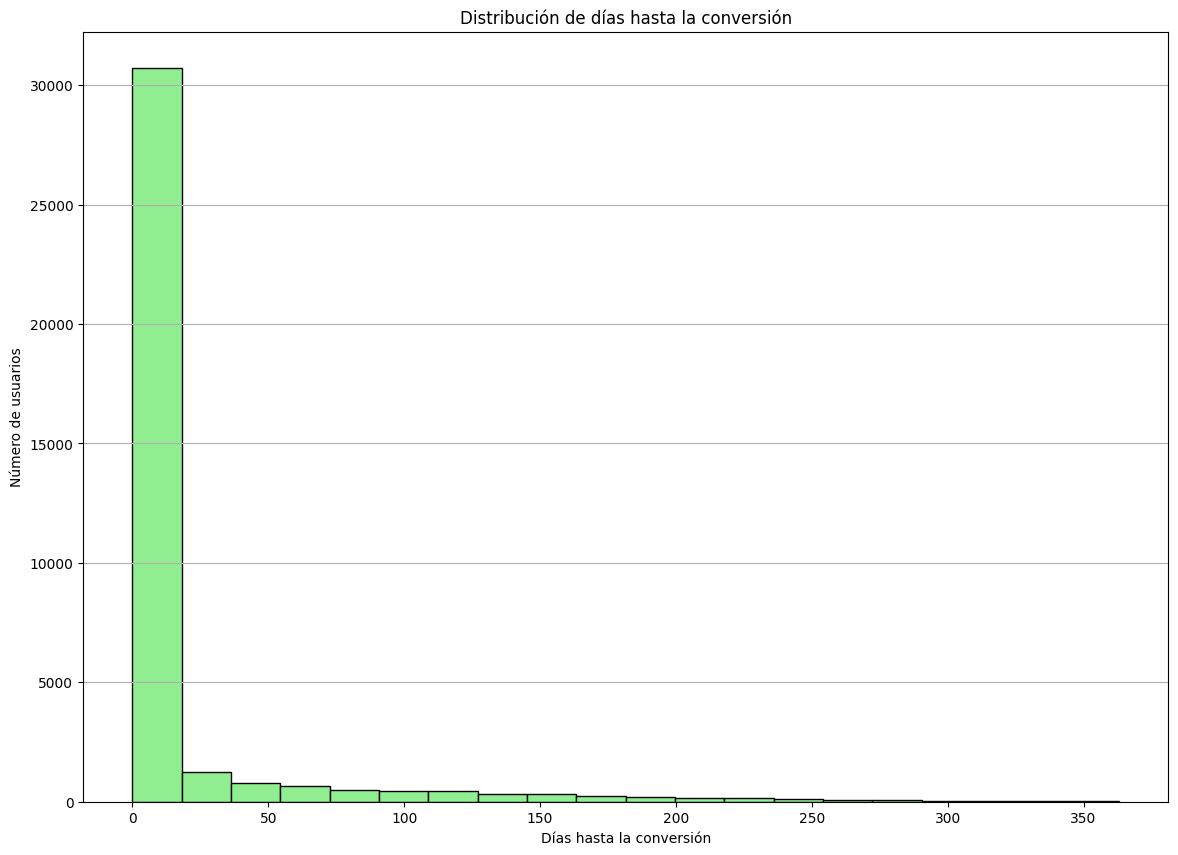

In [53]:
avg_days_to_conversion = users_conversion['days_to_conversion'].mean()

# Creación del gráfico de barras
plt.figure(figsize=(14, 10))
plt.hist(users_conversion['days_to_conversion'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribución de días hasta la conversión')
plt.xlabel('Días hasta la conversión')
plt.ylabel('Número de usuarios')
plt.grid(axis='y')


plt.show()

In [54]:
user_conversion_2 = users_conversion.groupby('days_to_conversion')['uid'].count().reset_index()
user_conversion_2.columns = ['days','users']
display(user_conversion_2.head())
display(user_conversion_2['users'].describe())


,days,users
0,0,25217
1,1,1779
2,2,671
3,3,504
4,4,351


count      348.000000
mean       104.951149
std       1354.545436
min          1.000000
25%          4.000000
50%         12.500000
75%         28.250000
max      25217.000000
Name: users, dtype: float64

La gran mayoría de usuarios compra el mismo día que visita la página, más del 50% de los usuarios compra en menos de 2 semanas 

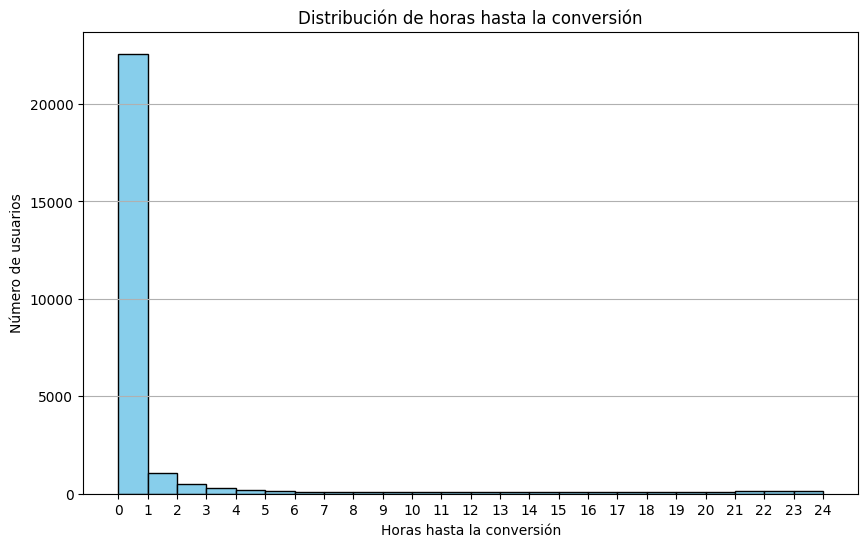

In [55]:
# Convertir minutos a horas
users_conversion['hours_to_conversion'] = users_conversion['mins_to_conversion'] / 60

# Creación del gráfico de barras
plt.figure(figsize=(10, 6))
plt.hist(users_conversion['hours_to_conversion'], bins=24, range=(0, 24), color='skyblue', edgecolor='black')
plt.title('Distribución de horas hasta la conversión')
plt.xlabel('Horas hasta la conversión')
plt.ylabel('Número de usuarios')

plt.xticks(range(0, 25))
plt.grid(axis='y')
plt.show()

La mayoría de los usuarios compra dentro de las primeras 4hrs. Esto nos da un indicio de que los visitantes, ya están decidos a comprar apenas visitan la página. 

### **Evaluemos cada cuánto tiempo realizan un pedido los clientes**

Se agregarán dos nuevas columnas a la tabla `orders` para almacenar el año (`orders_year`) y el mes (`orders_month`) de cada compra.Para así agrupar los pedidos por año y mes, contando el número total de pedidos (`count`) y el número de usuarios únicos (`nunique`) que hicieron pedidos en cada periodo. Por último, se calcula el número promedio de pedidos por usuario (`orders_per_user`) dividiendo el número de ordendes por usuario 

In [56]:
orders['orders_year'] = orders['buy_ts'].dt.year
orders['orders_month'] = orders['buy_ts'].dt.month

orders_per_user = orders.groupby(['orders_year', 'orders_month']).agg({'uid':['count' , 'nunique']}).reset_index()
orders_per_user.columns = ['orders_year', 'orders_month', 'n_orders', 'n_users']
orders_per_user['orders_per_user'] = orders_per_user['n_orders'] / orders_per_user['n_users']
display(orders_per_user.head())

,orders_year,orders_month,n_orders,n_users,orders_per_user
0,2017,6,2354,2023,1.163618
1,2017,7,2363,1984,1.191028
2,2017,8,1807,1472,1.227582
3,2017,9,3387,2750,1.231636
4,2017,10,5679,4675,1.214759


In [57]:
print(orders_per_user['orders_per_user'].describe())

count    13.000000
mean      1.205823
std       0.068470
min       1.000000
25%       1.192784
50%       1.226298
75%       1.240254
max       1.273858
Name: orders_per_user, dtype: float64


La media de pedidos por usuario es de aproximadamente *1.21* por mes, con una desviación estándar de *0.068*. Esto indica que, en promedio, los usuarios hacen poco más de un pedido por mes, con una variabilidad relativamente baja.

### De estos usuarios,veamos el tamaño promedio de compra

Se determinará la fecha del primer pedido para cada usuario (`first_order_day`) y se unirá esta información a la tabla `orders

In [58]:
first_order_day = orders.groupby('uid')['buy_ts'].min()
first_order_day.name = 'first_order_day'

orders = orders.join(first_order_day, on='uid')

orders['first_order_month'] = orders['first_order_day'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

Se añadirán columnas a la tabla `orders` para almacenar el mes del primer pedido (`first_order_month`) y el mes de cada pedido (`order_month`)

In [59]:
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum', 'uid':'nunique'}).reset_index()
orders_grouped_by_cohorts.columns = ['first_order_month','order_month','revenue', 'n_users']

Busquemos los ingresos promedio por usuario (`revenue_per_user`) en cada cohorte y mes dividiendo el ingreso sobre el número de usuarios, redondeando los valores.

In [60]:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['n_users']
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue_per_user'].round()

orders_grouped_by_cohorts.head()

,first_order_month,order_month,revenue,n_users,revenue_per_user
0,2017-06-01,2017-06-01,9557.49,2023,5.0
1,2017-06-01,2017-07-01,981.82,61,16.0
2,2017-06-01,2017-08-01,885.34,50,18.0
3,2017-06-01,2017-09-01,1931.30,54,36.0
4,2017-06-01,2017-10-01,2068.58,88,24.0


In [61]:
print('Cantidad de compra promedio por usuario',orders_grouped_by_cohorts['revenue_per_user'].mean().round(2))

Cantidad de compra promedio por usuario 14.75


In [62]:
heatt = orders_grouped_by_cohorts.pivot_table(index='first_order_month', columns='order_month', values='revenue_per_user', aggfunc='mean')
display(heatt)

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,5.0,16.0,18.0,36.0,24.0,22.0,31.0,25.0,19.0,27.0,26.0,10.0,NaN
2017-07-01,NaN,6.0,12.0,21.0,11.0,7.0,8.0,6.0,7.0,7.0,13.0,12.0,NaN
2017-08-01,NaN,NaN,5.0,11.0,12.0,12.0,17.0,12.0,10.0,13.0,21.0,8.0,NaN
2017-09-01,NaN,NaN,NaN,6.0,22.0,13.0,139.0,20.0,26.0,27.0,17.0,11.0,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.0,11.0,7.0,7.0,7.0,7.0,7.0,7.0,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,13.0,7.0,5.0,8.0,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,5.0,8.0,39.0,48.0,27.0,24.0,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,9.0,12.0,11.0,5.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,9.0,5.0,7.0,NaN


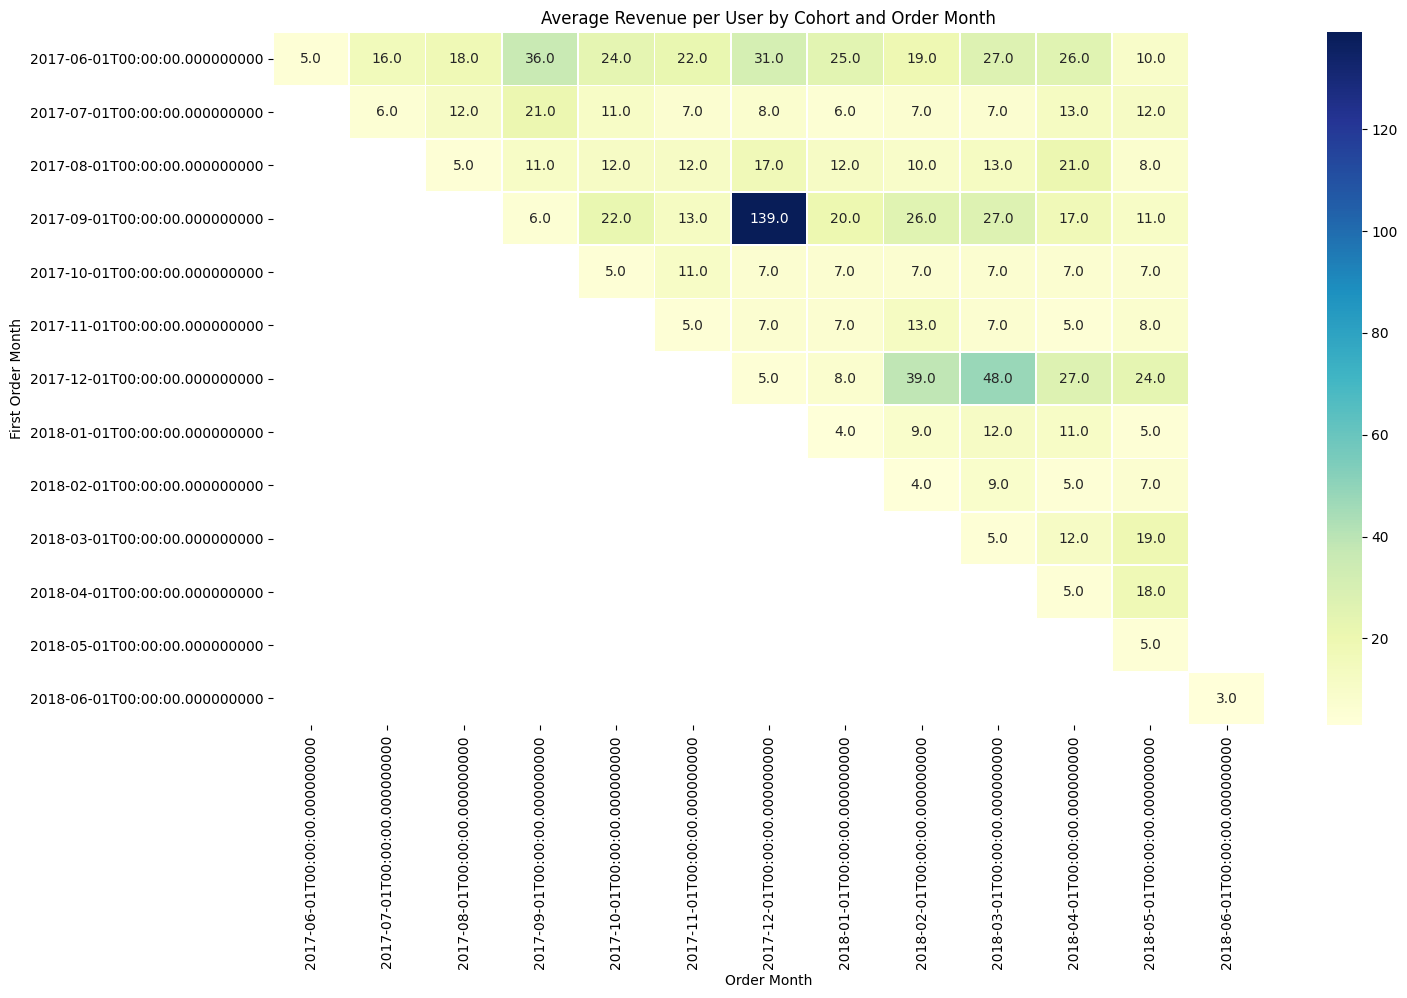

In [63]:
plt.figure(figsize=(16, 9))
plt.title('Average Revenue per User by Cohort and Order Month')
sns.heatmap(heatt, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)

plt.xlabel('Order Month')
plt.ylabel('First Order Month')

plt.show()

Los ingresos promedio por usuario varían significativamente entre los meses y cohortes, indicando fluctuaciones en el comportamiento de compra de los usuarios. Esto puede estar fuertemente influenciado por la demanda de ciertos producto en ciertos meses donde la economía se mueve más, por ejemplo, diciembre y la navidad. En relación con el ejemplo, tenemos que el cohorte de septiembre en el mes de diciembre generó un promedio de *$139*

**Media de compra por usuario**

In [64]:
median_purchase = orders.groupby(['first_order_month','order_month'])['revenue'].median().reset_index()
median_purchase['age_month'] = ((median_purchase['order_month'] - median_purchase['first_order_month']) / np.timedelta64(1,'M')).round()

median_purchase_piv=median_purchase.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='revenue', 
    aggfunc='mean'
)

median_purchase_piv.round(2).fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,2.44,3.6,3.05,4.28,3.3,2.44,3.05,3.05,3.39,3.67,4.28,1.83
2017-07-01,3.05,2.81,3.85,3.05,2.38,2.44,2.44,3.58,2.26,4.64,3.67,
2017-08-01,2.75,3.79,3.67,4.28,4.58,3.67,3.05,3.05,4.73,3.42,,
2017-09-01,2.44,4.89,2.93,5.53,2.93,4.89,3.4,3.48,3.91,,,
2017-10-01,2.44,2.75,2.69,2.72,3.3,2.62,2.38,2.57,,,,
2017-11-01,2.44,1.95,1.83,3.18,2.09,2.44,3.12,,,,,
2017-12-01,2.66,2.41,2.96,3.05,2.36,2.44,,,,,,
2018-01-01,2.44,2.44,2.44,3.05,2.08,,,,,,,
2018-02-01,2.44,2.44,2.33,2.26,,,,,,,,


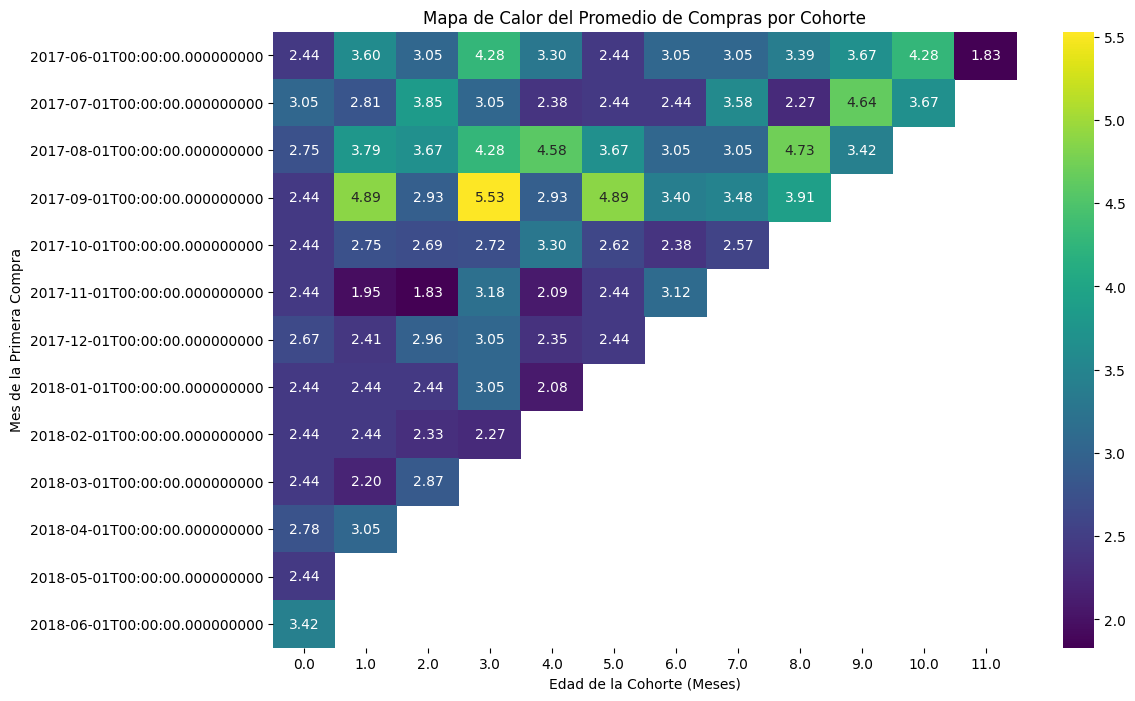

In [65]:
plt.figure(figsize=(12, 8))
sns.heatmap(median_purchase_piv, annot=True, fmt='.2f', cmap='viridis')
plt.title('Mapa de Calor del Promedio de Compras por Cohorte')
plt.xlabel('Edad de la Cohorte (Meses)')
plt.ylabel('Mes de la Primera Compra')
plt.show()

### **Cuánto dinero ha estado trayendo?**  

Repasemos los pasos para porder obetener el Lifetime Value (LTV):

Para este analísis buscaremos la fecha de la primera compra de cada usuario, seguido de calcular el número de nuevos usuarios por cada fecha. Después agregar el mes de la primera orden a la tabla 'orders', para finalmente agrupar la tabla y calcular la ganancia.

In [66]:
costs.head()


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [67]:
orders.head(3)

,uid,buy_ts,revenue,orders_year,orders_month,first_order_day,first_order_month,order_month
0,10329302124590727494,2017-06-01 00:10:00,17.00,2017,6,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,11627257723692907447,2017-06-01 00:25:00,0.55,2017,6,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,17903680561304213844,2017-06-01 00:27:00,0.37,2017,6,2017-06-01 00:27:00,2017-06-01,2017-06-01


Veamos la cantidad de el número de nuevos clientes cada mes 

In [68]:
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head() 

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Agrupación de usuarios por su primera compra en mes. 

A continucación se crea un cohorte para agrupar por primer mes de compra y el mes en fecha, los ingresos totales

In [69]:
cohortss = orders.groupby(['first_order_month', 'order_month']).agg({'revenue' : 'sum'}).reset_index()

cohortss.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Ahora unimos ambas tablas para obtener el reporte final 

In [70]:
report_ = pd.merge(cohort_sizes, cohortss, on = 'first_order_month')
report_.head(5)

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


Dado que el LTV se calcula sobre la base de los ingresos brutos en lugar de los ingresos, necesitamos encontrar los ingresos brutos multiplicando los ingresos por la rentabilidad.

Además, el LTV es un parámetro relativo y es más fácil de estudiar para cohortes "maduras", así que hagamos que las columnas muestren la edad de la cohorte en lugar del mes del pedido.

In [71]:
margin_rate = .5

report_['gp'] = report_['revenue'] * margin_rate
report_['age'] = (report_['order_month'] - report_['first_order_month']) / np.timedelta64(1, 'M')
report_['age'] = report_['age'].round().astype('int')

report_.head() 

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0
1,2017-06-01,2023,2017-07-01,981.82,490.910,1
2,2017-06-01,2023,2017-08-01,885.34,442.670,2
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4


Ahora si, calculemos el Lifetime Value diviendo el ingreso bruto de la cohorte de cada mes por el número total de usuarios de cada cohorte

In [72]:
report_['ltv'] = report_['gp'] / report_['n_buyers']

salida = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').round(2)

# Cambio
salida.cumsum(axis = 1).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.36,2.6,2.82,3.3,3.81,4.18,4.66,4.95,5.23,5.53,5.82,5.95
2017-07-01,3.01,3.18,3.49,3.67,3.76,3.84,3.9,3.97,4.05,4.12,4.2,
2017-08-01,2.64,2.88,3.11,3.31,3.56,3.7,3.81,4.01,4.16,4.25,,
2017-09-01,2.82,3.38,3.64,5.63,5.83,6.15,6.5,6.62,6.71,,,
2017-10-01,2.50,2.77,2.87,2.95,3.03,3.09,3.13,3.19,,,,
2017-11-01,2.58,2.78,2.88,3.04,3.11,3.14,3.2,,,,,
2017-12-01,2.37,2.5,2.96,3.49,3.65,3.82,,,,,,
2018-01-01,2.07,2.22,2.37,2.44,2.47,,,,,,,
2018-02-01,2.08,2.22,2.26,2.3,,,,,,,,


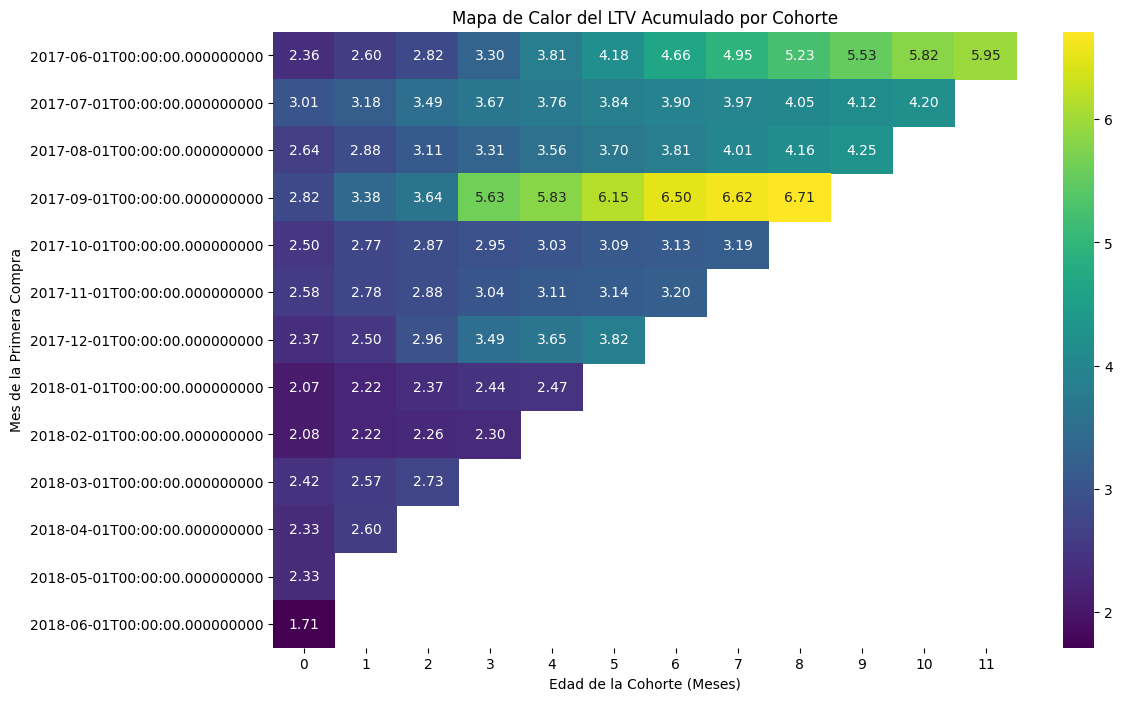

In [73]:
plt.figure(figsize=(12, 8))
sns.heatmap(salida.cumsum(axis = 1), annot=True, fmt='.2f', cmap='viridis')
plt.title('Mapa de Calor del LTV Acumulado por Cohorte')
plt.xlabel('Edad de la Cohorte (Meses)')
plt.ylabel('Mes de la Primera Compra')
plt.show()

Calculemos cuánto generó cada cliente de la primera cohorte durante el perido de 12 meses

In [74]:
ltv_06_17 = salida.loc['2017-06-01'].sum().round(2)
print(ltv_06_17)

5.95


Los clientes del primer cohort generaron en compras un promedio de *$5.95* durante sus 12 meses de tiempo de vida

## **Marketing** 

### Cuánto dinero se gastó?

En esta parte, ahora veremos el rendimiento de la inversión de marketing en atraer a los clientes que compraron. Primero veamos cuánto se gastó en cada fuente de marketing 

In [75]:
costs.head(2)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25


*Total de dinero invertido durate este periodo*

In [76]:
total_spent = costs['costs'].sum()
print(f"Total de dinero gastado: {total_spent}")

Total de dinero gastado: 329131.62


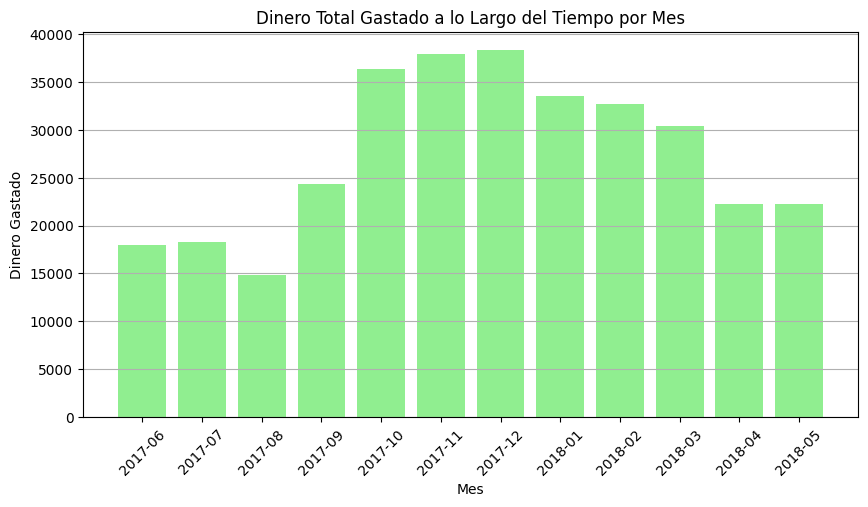

In [77]:
# Calcular el dinero gastado a lo largo del tiempo, agrupado por mes

costs['month'] = costs['dt'].dt.to_period('M')

spent_over_time = costs.groupby('month')['costs'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(spent_over_time['month'].astype(str), spent_over_time['costs'], color='lightgreen')
plt.xlabel('Mes')
plt.ylabel('Dinero Gastado')
plt.title('Dinero Total Gastado a lo Largo del Tiempo por Mes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

A lo largo del período ha habído un incremento mensual en los gastos. Donde podemos notar que en el último cuatrimestre del año 2017 tuvo una subida notable, sobrepasando la barrera de los *20000* con un punto máximo cercano a los *40000* . Después de diciembre de 2018 tuvo una bajada progresiva hasta los niveles de los *20000* por mes. Se nota un patrón marcado de inversión según las fechas **'peak season'** o meses **'Q4'** 

#### *Cuál fue la fuente de adquisión con más gastos?*

In [78]:
spent_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
print("\nDinero gastado por fuente de adquisición:")
display(spent_by_source)



Dinero gastado por fuente de adquisición:


,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


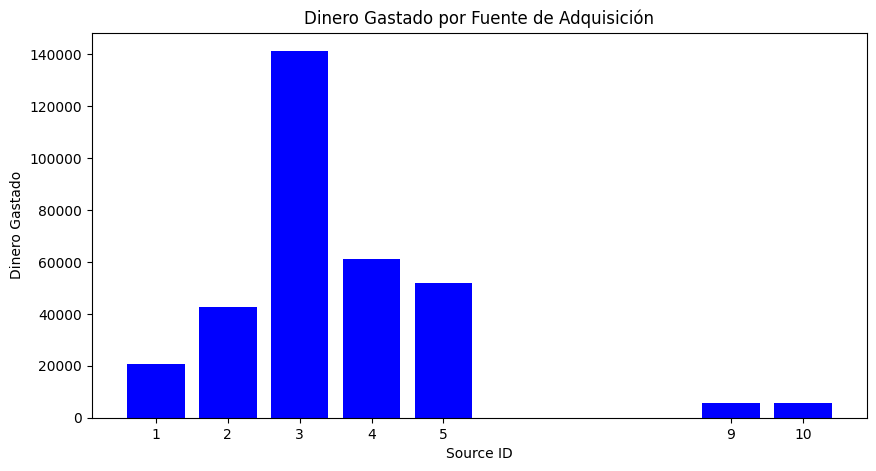

In [79]:
plt.figure(figsize=(10, 5))
plt.bar(spent_by_source['source_id'], spent_by_source['costs'], color='blue')
plt.xlabel('Source ID')
plt.ylabel('Dinero Gastado')
plt.title('Dinero Gastado por Fuente de Adquisición')
plt.xticks(spent_by_source['source_id'])
plt.show()

A simple vista se puede notar que la fuente número 3 es la que tiene mayor inversión

In [80]:
costs['costs_per_source'] = costs['costs'] / costs['source_id']
costs_plt = costs.pivot_table(index='month', columns='source_id', values ='costs_per_source', aggfunc='sum')
display(costs_plt)

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06,1125.61,1213.690,2577.216667,878.7000,523.224,31.691111,31.422
2017-07,1072.88,1166.555,2558.123333,882.4325,599.628,33.615556,32.982
2017-08,951.81,905.525,2047.846667,804.3400,437.056,27.658889,23.257
2017-09,1502.01,1492.830,3321.183333,1298.0650,769.828,46.180000,46.067
2017-10,2315.75,2422.500,5245.746667,1605.2100,1153.480,67.712222,62.724
2017-11,2445.16,2623.840,5675.113333,1347.2050,1265.068,75.908889,79.236
2017-12,2341.20,2448.900,5406.506667,1920.1175,1174.504,73.108889,64.586
2018-01,2186.18,2078.870,4936.260000,1458.1975,1074.304,60.795556,61.435
2018-02,2204.48,2237.170,4742.853333,1427.9900,1014.262,61.277778,48.088


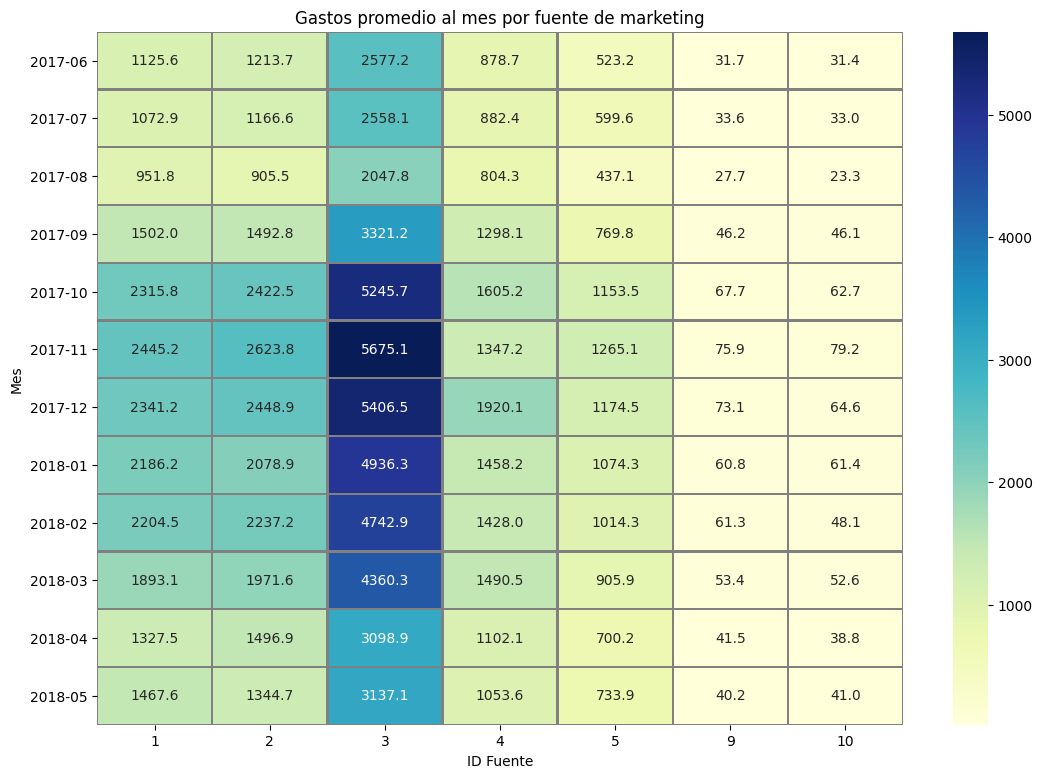

In [81]:

plt.figure(figsize=(13, 9))
plt.title('Gastos promedio al mes por fuente de marketing')
sns.heatmap(costs_plt, annot=True, fmt='.1f',cmap = "YlGnBu",  linewidths=1, linecolor='gray')
plt.xlabel('ID Fuente')
plt.ylabel('Mes')
plt.yticks(rotation=0)
plt.show()

Entre en el mes de Octubre al mes de Enero, los ID de fuentes 1,2 y 3 tuvieron un alto gasto, indicando que son las más usadas para los meses donde más se activa la economía.

### **Costo de adquisición de cada una de las fuentes**

Juntamos las tablas `report_` y `costs` para poder sacar el Costo por adquisición de cada una de la fuentes de inversió. En las tablas, incorporaremos el mes para poder usar el método `merge.()` y unir ambas tablas.

In [82]:
report_.head(5)



,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265


In [83]:
report_['month'] = report_['order_month'].dt.to_period('M')

In [84]:
report_.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,month
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,2017-06
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,2017-07
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,2017-08
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336,2017-09
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265,2017-10


In [85]:
costs.head(5)

,source_id,dt,costs,month,costs_per_source
0,1,2017-06-01,75.20,2017-06,75.20
1,1,2017-06-02,62.25,2017-06,62.25
2,1,2017-06-03,36.53,2017-06,36.53
3,1,2017-06-04,55.00,2017-06,55.00
4,1,2017-06-05,57.08,2017-06,57.08


In [86]:
costs['month_date'] = costs['dt'].astype('datetime64[M]')

Sumemos los costos por fuente de ingreso y mes

In [87]:
# Sumar los costos por cada fuente de adquisición y mes
costs_by_source = costs.groupby(['source_id', 'month'])['costs'].sum().reset_index()

# Sumar los compradores por cada mes
buyers_by_month = report_.groupby('month')['n_buyers'].sum().reset_index()

# Hacer el merge de los dos DataFrames por la columna 'month'
cac = pd.merge(costs_by_source, buyers_by_month, on='month')

# Calcular el costo de adquisición de clientes (CAC) por fuente

cac['CAC'] = cac['costs'] / cac['n_buyers']

cac_ = cac.groupby(['source_id','month'])['CAC'].sum().reset_index()

cac_2 = cac.groupby('source_id')['CAC'].sum().reset_index()

cac_2.columns = ('source_id','CAC')

display(cac_2.head(30))

,source_id,CAC
0,1,1.960382
1,2,4.087171
2,3,13.378724
3,4,6.006502
4,5,4.849927
5,9,0.519607
6,10,0.554510


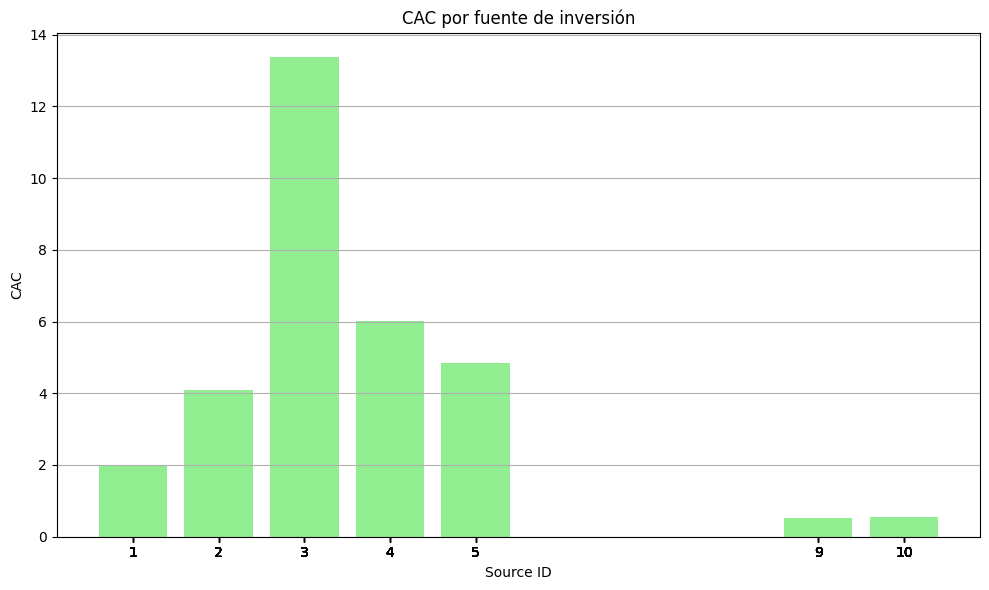

In [88]:
plt.figure(figsize=(10, 6))
plt.bar(cac_2['source_id'], cac_2['CAC'], color='lightgreen', )

plt.xlabel('Source ID')
plt.ylabel('CAC')
plt.title('CAC por fuente de inversión')
plt.grid(axis='y')
plt.xticks(cac['source_id'])
plt.tight_layout()

plt.show()

In [89]:
cac.groupby('source_id').agg({'CAC': 'mean'}).round(2)

,CAC
source_id,
1,0.16
2,0.34
3,1.11
4,0.50
5,0.40
9,0.04
10,0.05


###  **Evaluemos que tan rentables son las inversiones (ROMI)**

Para realizar esto, se realiza los calculos de ganancia por cada mes de la tabala  `costs`. Se calculará el CAC para cada cohorte. Primero encontraremos los gastos totales de cada mes, luego los dividiremos por la cantidad de clientes en cada cohorte.

In [90]:
costs.head()

,source_id,dt,costs,month,costs_per_source,month_date
0,1,2017-06-01,75.20,2017-06,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06,57.08,2017-06-01


In [91]:
# calculo costo por mes según la fuente
monthly_costs = costs.groupby(['month', 'source_id'])['costs'].sum().reset_index()
monthly_costs 

,month,source_id,costs
0,2017-06,1,1125.61
1,2017-06,2,2427.38
2,2017-06,3,7731.65
3,2017-06,4,3514.80
4,2017-06,5,2616.12
...,...,...,...
79,2018-05,3,9411.42
80,2018-05,4,4214.21
81,2018-05,5,3669.56
82,2018-05,9,362.17


In [92]:
report_.head(3)

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,month
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,2017-06
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,2017-07
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,2017-08


In [93]:
report_['first_order_month'] = pd.to_datetime(report_['first_order_month']).dt.to_period('M')

In [94]:
# Realizar el merge
report_2 = pd.merge(report_, monthly_costs, left_on='first_order_month', right_on='month' )

# Calcular el CAC para posteriormente calcular el ROMI
report_2['cac'] = report_2['costs'] / report_2['n_buyers']

display(report_2)

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,month_x,month_y,source_id,costs,cac
0,2017-06,2023,2017-06-01,9557.49,4778.745,0,2.362207,2017-06,2017-06,1,1125.61,0.556406
1,2017-06,2023,2017-06-01,9557.49,4778.745,0,2.362207,2017-06,2017-06,2,2427.38,1.199891
2,2017-06,2023,2017-06-01,9557.49,4778.745,0,2.362207,2017-06,2017-06,3,7731.65,3.821873
3,2017-06,2023,2017-06-01,9557.49,4778.745,0,2.362207,2017-06,2017-06,4,3514.80,1.737420
4,2017-06,2023,2017-06-01,9557.49,4778.745,0,2.362207,2017-06,2017-06,5,2616.12,1.293188
...,...,...,...,...,...,...,...,...,...,...,...,...
541,2018-05,2988,2018-05-01,13925.76,6962.880,0,2.330281,2018-05,2018-05,3,9411.42,3.149739
542,2018-05,2988,2018-05-01,13925.76,6962.880,0,2.330281,2018-05,2018-05,4,4214.21,1.410378
543,2018-05,2988,2018-05-01,13925.76,6962.880,0,2.330281,2018-05,2018-05,5,3669.56,1.228099
544,2018-05,2988,2018-05-01,13925.76,6962.880,0,2.330281,2018-05,2018-05,9,362.17,0.121208


In [95]:
# eliminamos valores 0, replazando por nulos
report_2['cac'] = report_2['cac'].replace(0, np.nan)  
report_2['romi'] = (report_2['ltv'] / report_2['cac']) / 10

output_2 = report_2.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

output_2_cumsum = output_2.cumsum(axis=1).round(2)

display(output_2_cumsum)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.60,0.66,0.72,0.84,0.97,1.06,1.18,1.26,1.33,1.40,1.48,1.51
2017-07,0.70,0.74,0.81,0.85,0.87,0.89,0.90,0.92,0.94,0.95,0.97,NaN
2017-08,0.56,0.61,0.66,0.70,0.75,0.78,0.81,0.85,0.88,0.90,NaN,NaN
2017-09,0.64,0.76,0.82,1.27,1.32,1.39,1.47,1.50,1.52,NaN,NaN,NaN
2017-10,0.66,0.73,0.76,0.78,0.80,0.81,0.83,0.84,NaN,NaN,NaN,NaN
2017-11,0.56,0.60,0.63,0.66,0.68,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12,0.60,0.64,0.75,0.89,0.93,0.97,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.46,0.49,0.52,0.54,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.54,0.58,0.59,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


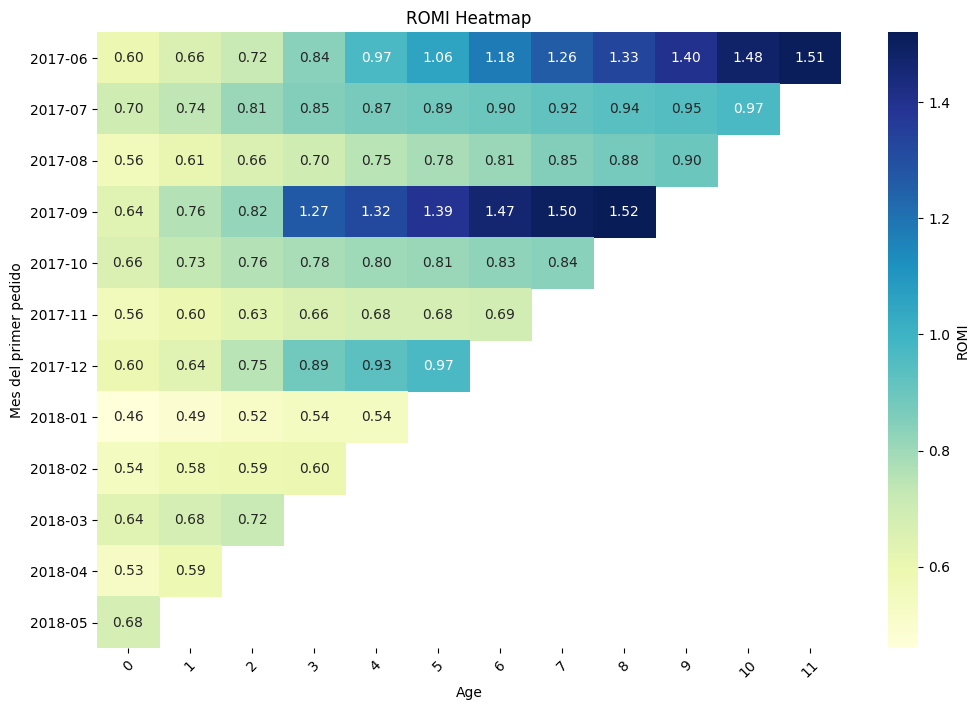

In [96]:
plt.figure(figsize=(12, 8))
sns.heatmap(output_2_cumsum, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'ROMI'})
plt.title('ROMI Heatmap')
plt.xlabel('Age')
plt.ylabel('Mes del primer pedido')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

**Para ver más de cerca el desempeño de las fuentes de inversión, se crea una tabla dinámica el cual agrupe las primeras ordenes `first_order_month`y las fuentes `source_id`.

In [97]:
# tabla para desglosar el ROMI por fuente
output_2 = report_2.pivot_table(
    index=['first_order_month', 'source_id'], 
    columns='age', 
    values='romi', 
    aggfunc='mean'
)

output_2_cumsum = output_2.cumsum(axis=1).round(2)

#output_2_cumsum

A continuación, veamos gráficamente los detalles en Mapas de calor

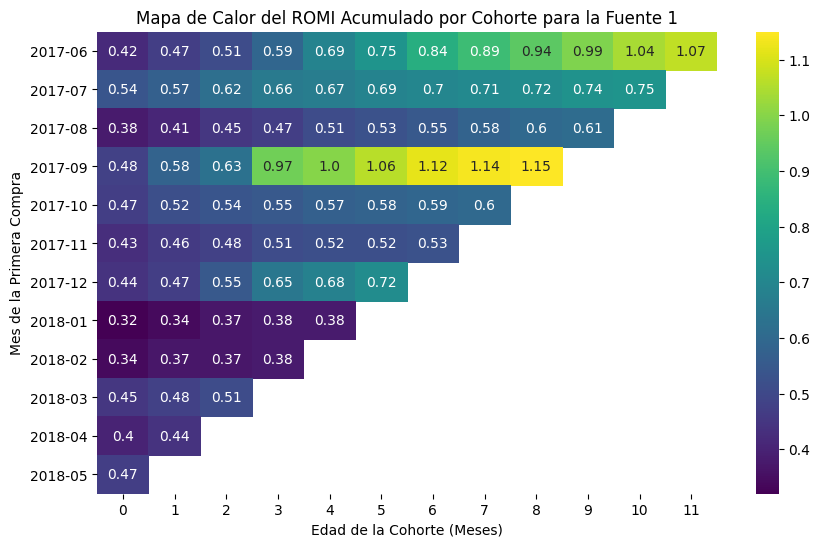

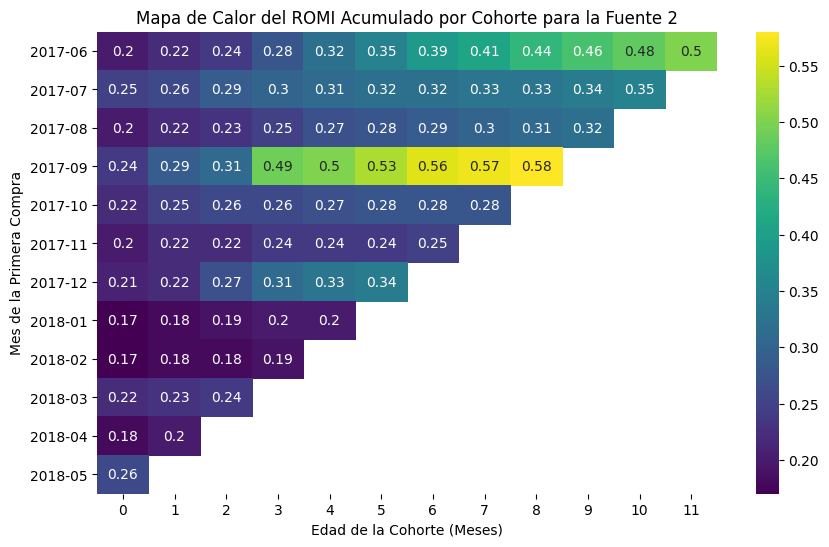

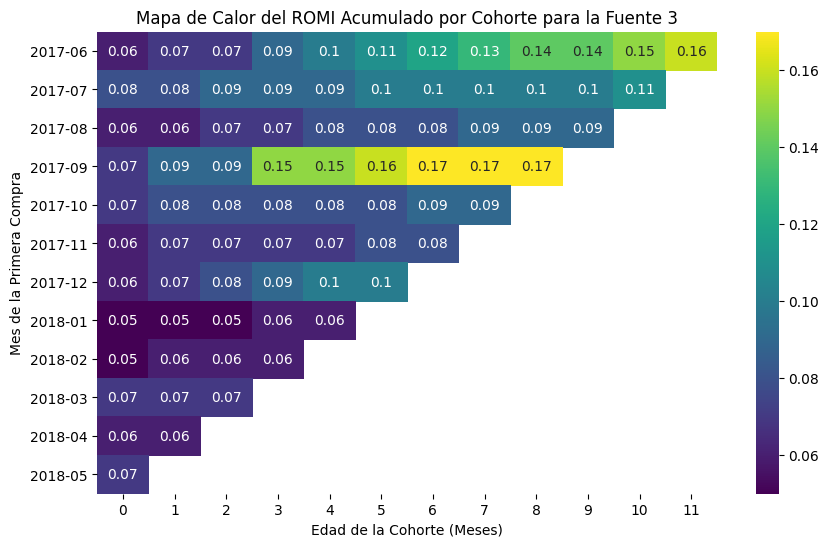

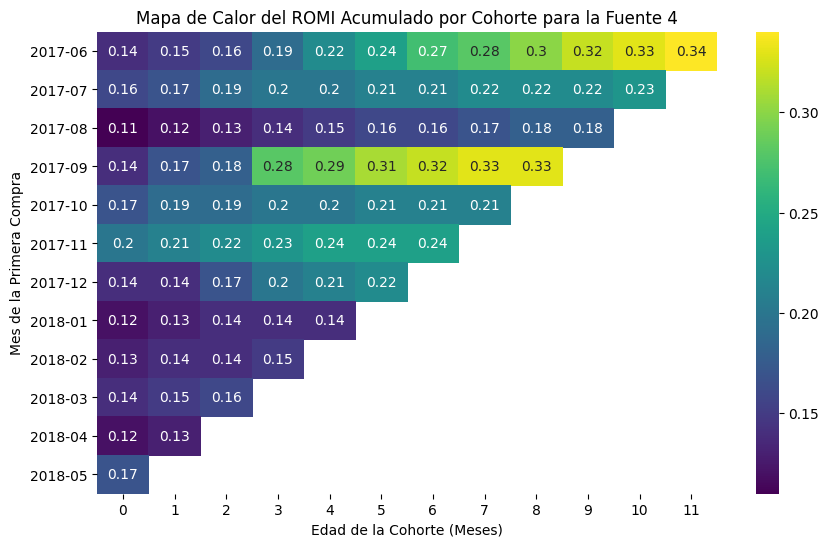

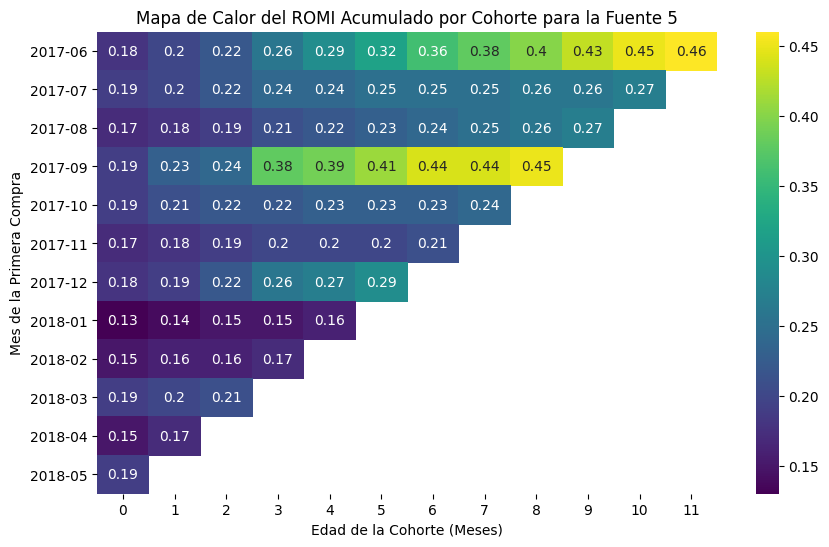

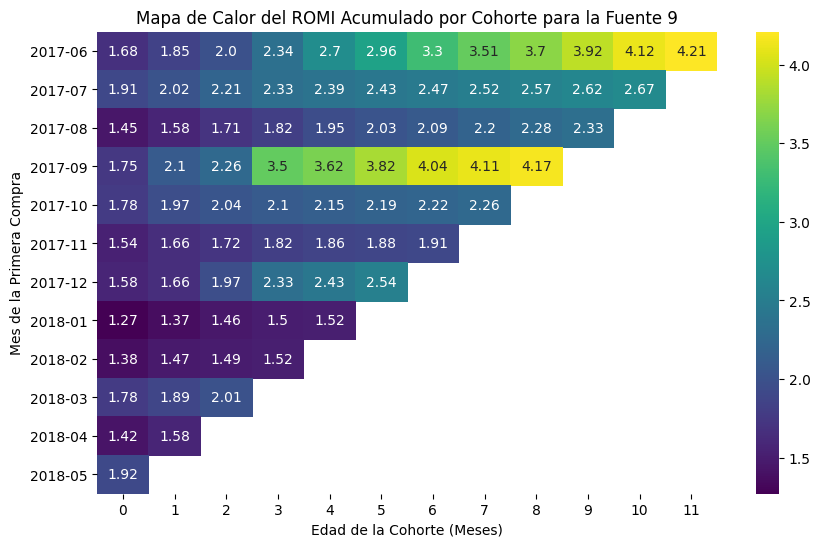

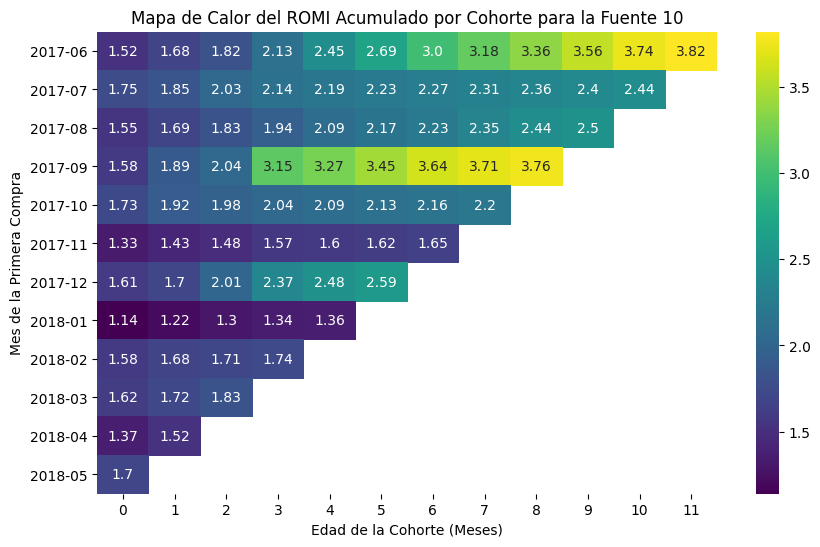

In [98]:
# Crear el mapa de calor para cada fuente
for source in report_2['source_id'].unique():
    plt.figure(figsize=(10, 6))
    sns.heatmap(output_2_cumsum.xs(source, level='source_id'), annot=True, fmt='', cmap='viridis')
    plt.title(f'Mapa de Calor del ROMI Acumulado por Cohorte para la Fuente {source}')
    plt.xlabel('Edad de la Cohorte (Meses)')
    plt.ylabel('Mes de la Primera Compra')
    plt.show()

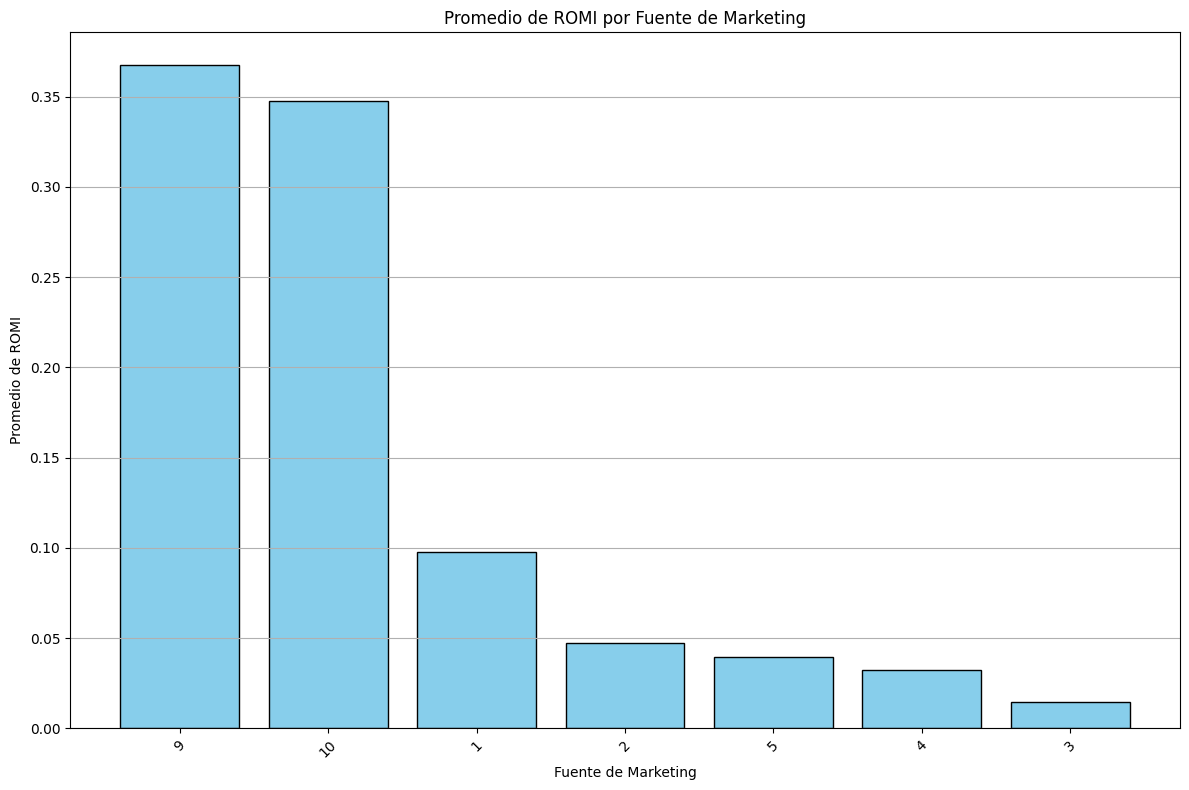

In [105]:
plt.figure(figsize=(12, 8))
plt.bar(romi_by_source_sorted['source_id'].astype(str), romi_by_source_sorted['romi'], color='skyblue', edgecolor='black')
plt.title('Promedio de ROMI por Fuente de Marketing')
plt.xlabel('Fuente de Marketing')
plt.ylabel('Promedio de ROMI')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Conclusiones

Conclusión General

1. Uso de la Página:

Promedio de Usuarios: Hay un promedio de 907 usuarios únicos por día, 4,911 por semana y 23,228 por mes.
Frecuencia de Sesiones: Cada usuario realiza, en promedio, 1.08 sesiones por día, indicando que la mayoría regresa al sitio al menos una vez al día.

Tendencias Temporales: Se observa un aumento significativo en la frecuencia de visitas en agosto de 2017, con estabilización en octubre y picos importantes en diciembre, alcanzando hasta 4,000 visitas diarias.

Frecuencia por Día de la Semana y Hora: Los usuarios visitan más frecuentemente durante los días hábiles, especialmente los jueves, y durante las horas habituales de atención en comercios (10:00-17:00) y en la noche (21:00-22:00).

2. Ventas: 

Promedio y Distribución: La mayoría de los usuarios realiza su primera compra el mismo día que visitan la página. Más del 50% de los usuarios compran en menos de 2 semanas, y el 95% compra en menos de 2 semanas. Dentro de este grupo, la mayoría (más del 60%) realiza la compra dentro de las primeras 4 horas. Este comportamiento sugiere que los visitantes llegan con una alta intención de compra, lo que puede indicar una buena eficacia de la página en convertir visitas en ventas.
  
  -Frecuencia de Compras:

El promedio de pedidos por usuario es de aproximadamente 1.21 por mes, con una desviación estándar de 0.068. Esto muestra que los usuarios realizan poco más de un pedido por mes, con una variabilidad relativamente baja. Esto sugiere un patrón de compra regular pero no excesivamente frecuente.

  -Tamaño de Compra Promedio:

 El tamaño promedio de compra por usuario es de 14.75 . Los ingresos promedio por usuario varían según el mes y el cohorte, mostrando fluctuaciones significativas. Por ejemplo, en diciembre, el cohorte que realizó su primera compra en septiembre generó un promedio de $139 en ingresos por usuario. Esto indica que los ingresos pueden estar influenciados por factores estacionales y eventos especiales, como las compras navideñas.

3. Efectividad de Inversión en Marketing:

Inversión y ROMI: Las campañas de marketing han mostrado una alta variabilidad en su efectividad. Fuentes como la 1, 2 y 5 han demostrado ser altamente rentables, con altos valores de ROMI, mientras que las fuentes 3 y 10 han tenido un rendimiento bajo. 

4. Estrategia de Gastos:

La estrategia de incrementar los gastos en marketing durante la temporada alta jugó un papel impotante, con un incremento correlacionado en las ventas. Es crucial asegurar que los gastos estén dirigidos a las fuentes más efectivas para maximizar el retorno de inversión.
